In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [2]:
df=pd.read_csv('model_data.csv')

In [3]:
df.drop(columns=['MA_vs_AI','Unnamed: 0', "GT_vs_AI"],inplace=True)
df['date'] = pd.to_datetime(df['date'])
df

Tree  Ground Truth  Number of manual annotations  AI detections  variety  \
0       1             7                             7              3        1   
1       3            25                            15             20        1   
2       4            19                             3              3        1   
3       5             4                            20             29        1   
4       6            38                            13             13        1   
..    ...           ...                           ...            ...      ...   
413    19            23                            34             41        5   
414    20            32                            47             46        5   
415    21             6                             6              7        5   
416    22            23                            27             31        5   
417    23            15                            12             11        5   

     GS  field       date  
0    83      8 2023-08-09  
1    83      8 2023-08-09  
2    83      8 2023-08-09  
3    83      8 2023-08-09  
4    83      8 2023-08-09  
..   ..    ...        ...  
413  84      5 2023-08-30  
414  84      5 2023-08-30  
415  84      5 2023-08-30  
416  84      5 2023-08-30  
417  84      5 2023-08-30  

[418 rows x 8 columns]

# Cabernet


In [4]:
Cabernet_df=df[df['variety']==0]

### Boxplot

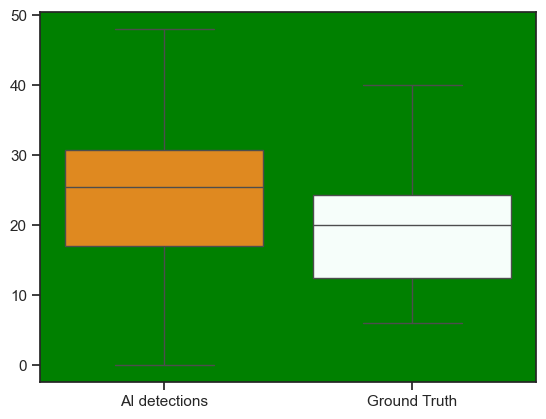

In [5]:
columns_to_plot =['AI detections','Ground Truth']
sns.set(style="ticks")
box_colors = ["darkorange","mintcream"]
ax = sns.boxplot(data=Cabernet_df[columns_to_plot], palette=box_colors)
ax.set_facecolor("green")
plt.show()

### Pairplot

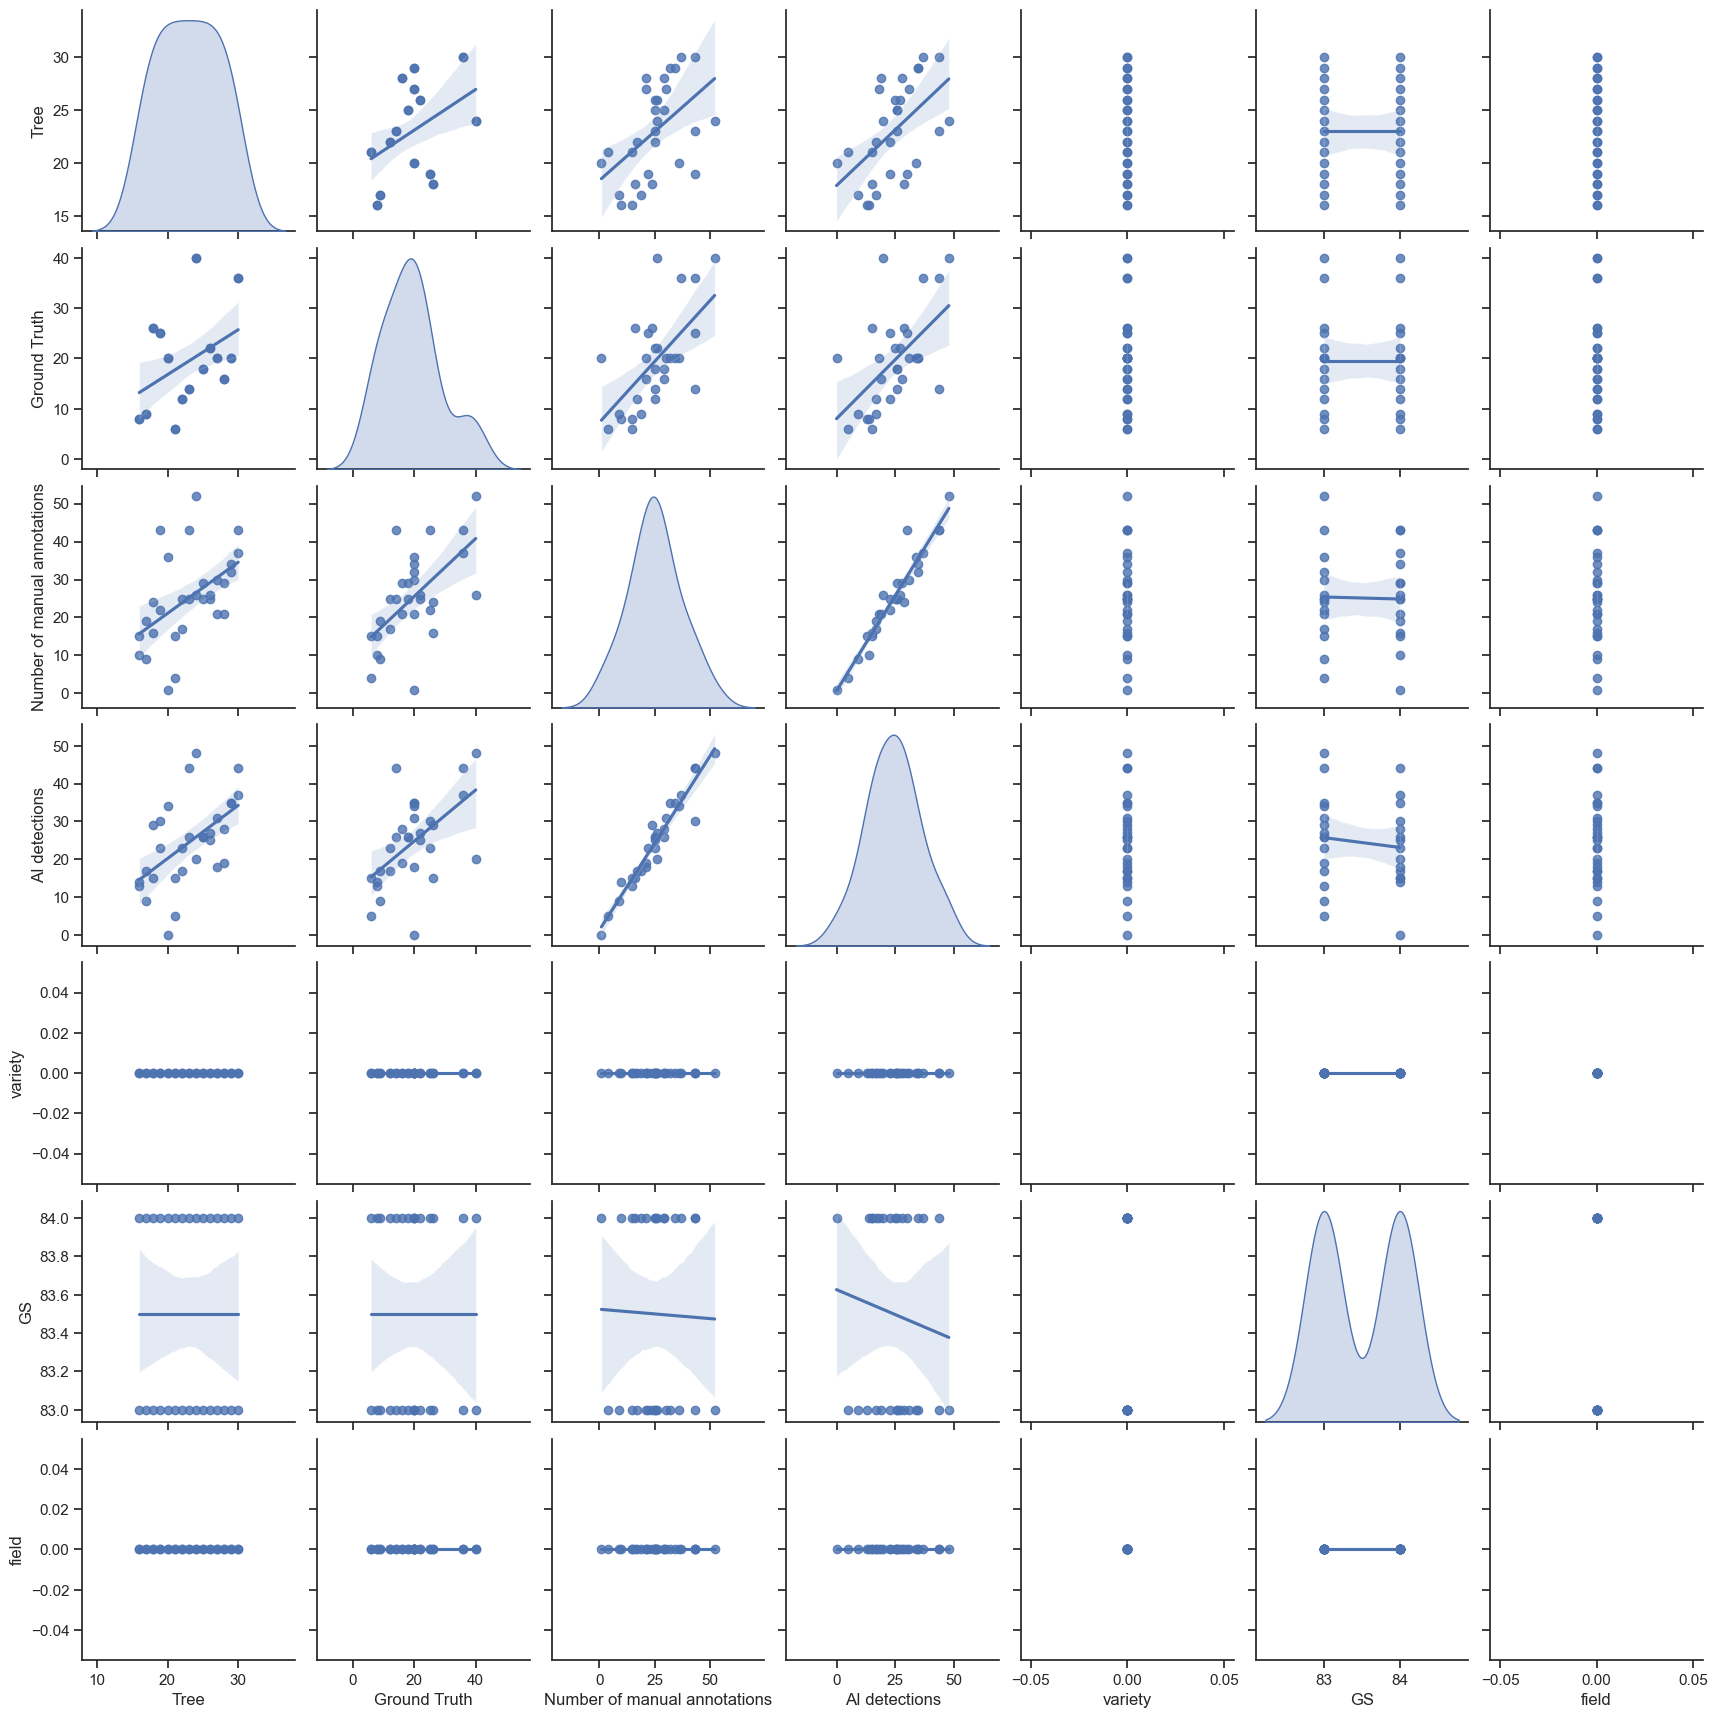

In [6]:
sns.pairplot(Cabernet_df,kind='reg',diag_kind='kde');

### Lineplots

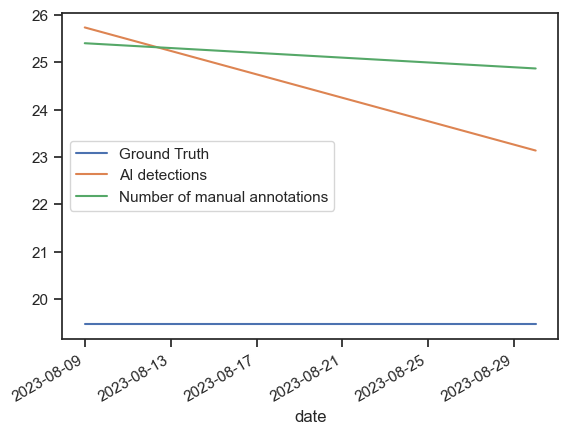

In [7]:
Cabernet_df.groupby('date')['Ground Truth','AI detections','Number of manual annotations'].mean().plot();

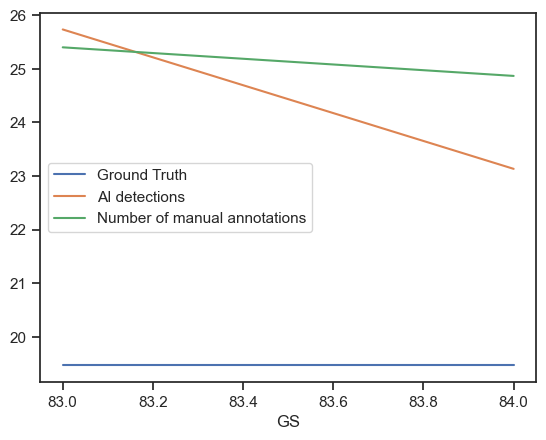

In [8]:
Cabernet_df.groupby('GS')['Ground Truth','AI detections','Number of manual annotations'].mean().plot();

### Scatterplot

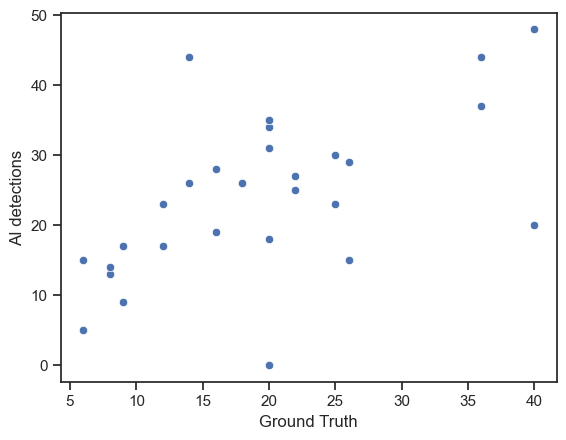

In [9]:
sns.scatterplot(x = Cabernet_df['Ground Truth'], y = Cabernet_df['AI detections']);

# Dunkelfelder

In [10]:
Dunkelfelder_df=df[df['variety']==1]

### Boxplot

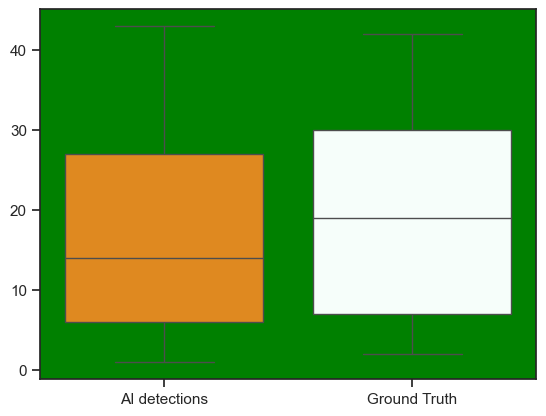

In [11]:
columns_to_plot =['AI detections','Ground Truth']
sns.set(style="ticks")
box_colors = ["darkorange","mintcream"]
ax = sns.boxplot(data=Dunkelfelder_df[columns_to_plot], palette=box_colors)
ax.set_facecolor("green")
plt.show()

### Pairplot

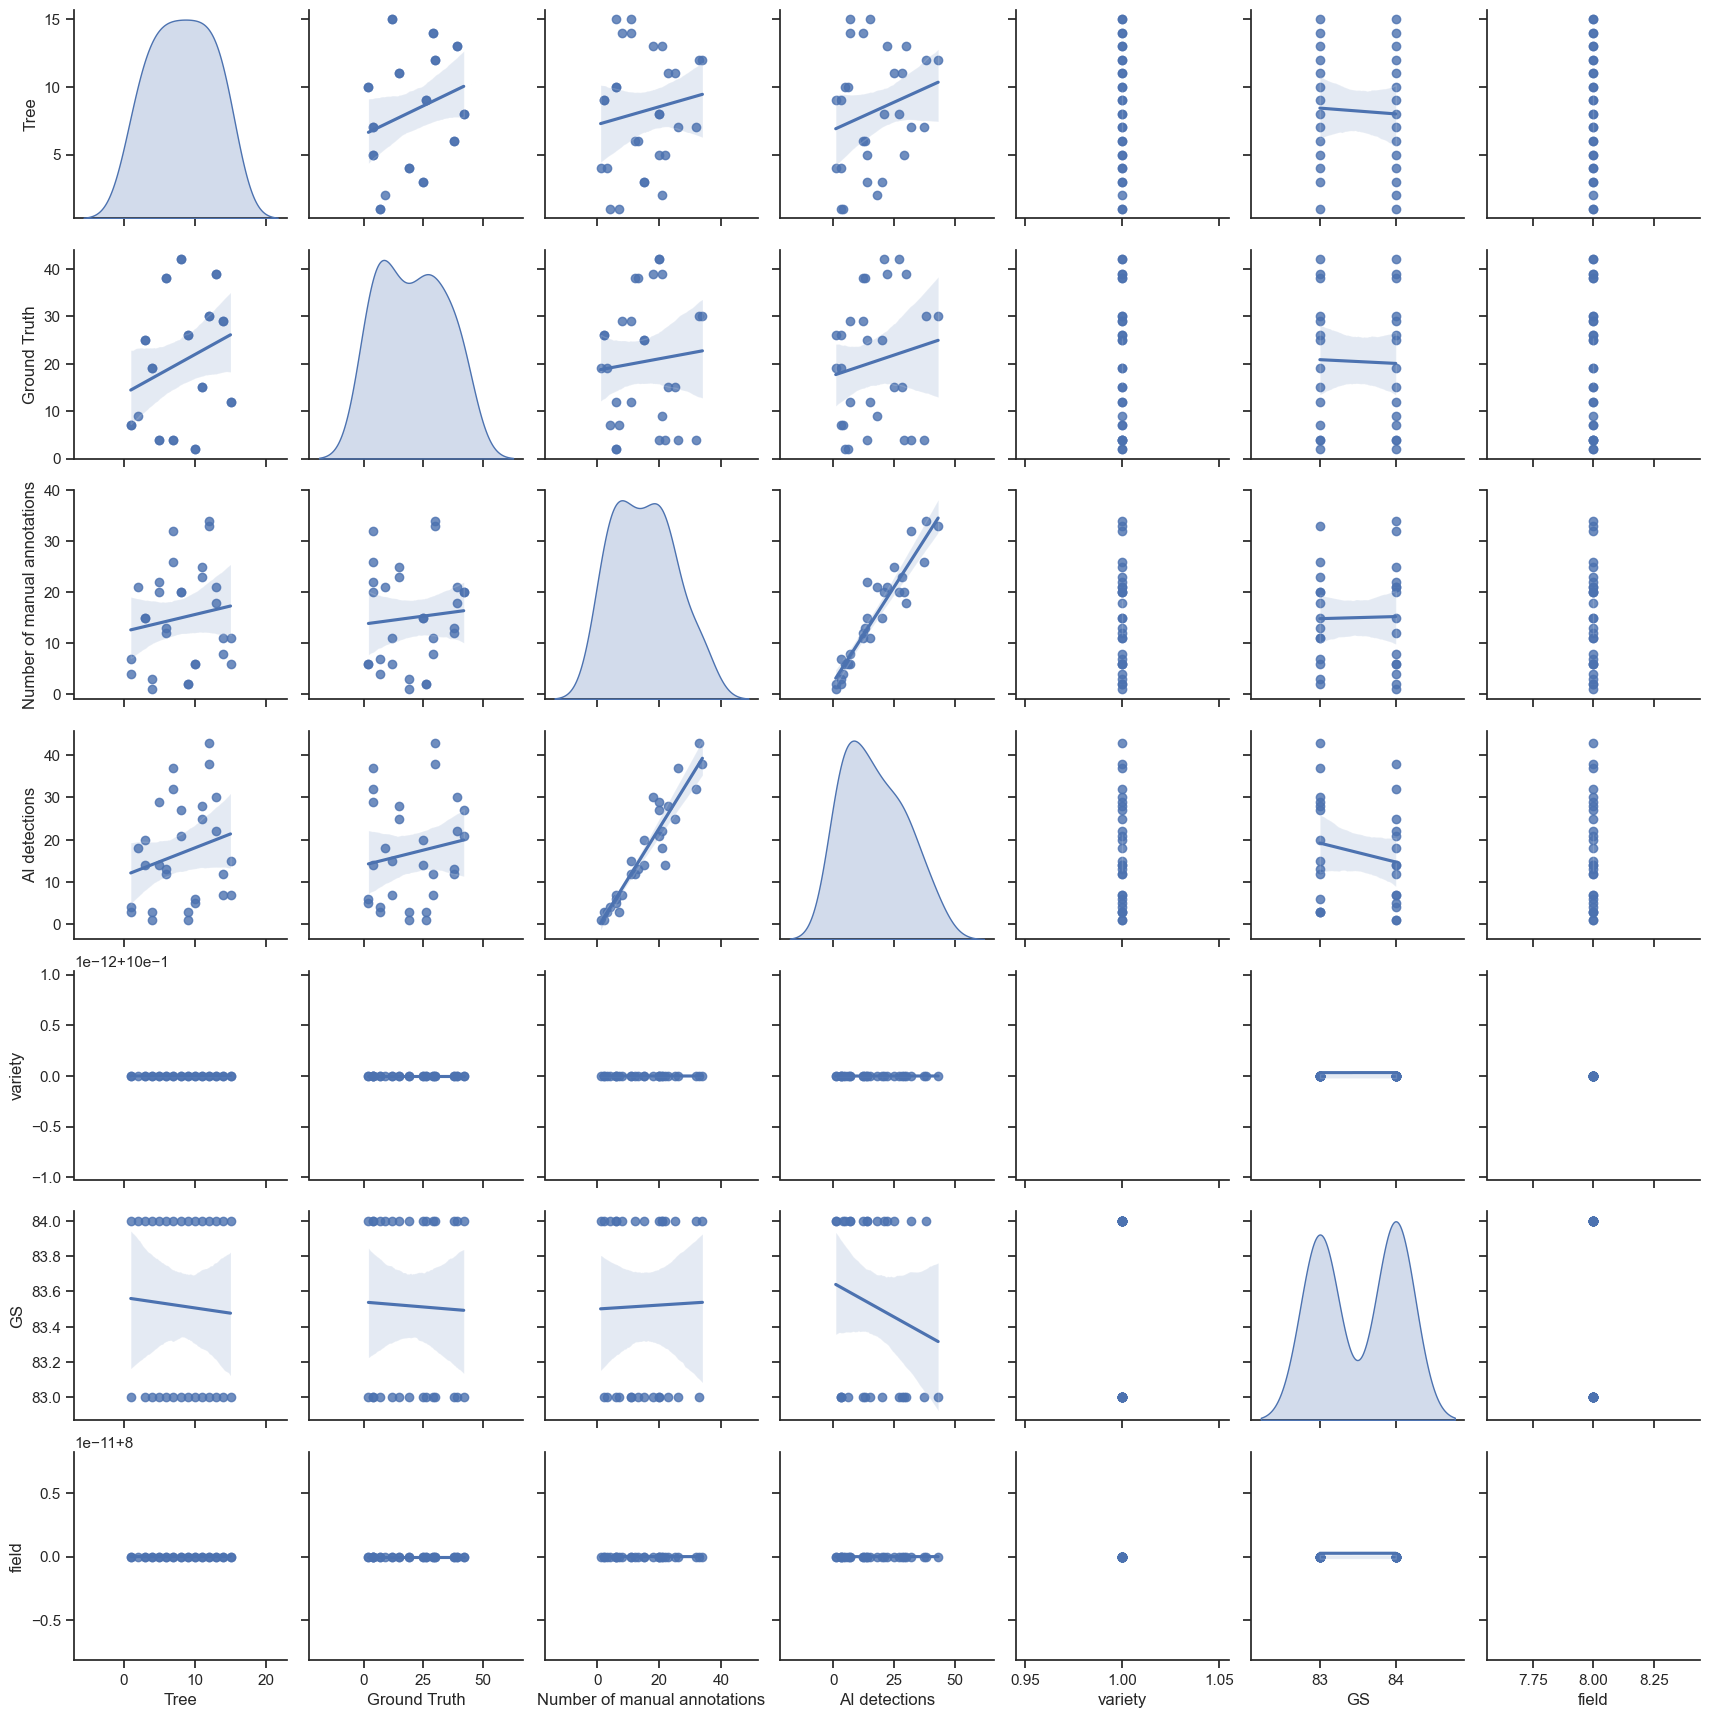

In [12]:
sns.pairplot(Dunkelfelder_df,kind='reg',diag_kind='kde');

### Lineplots

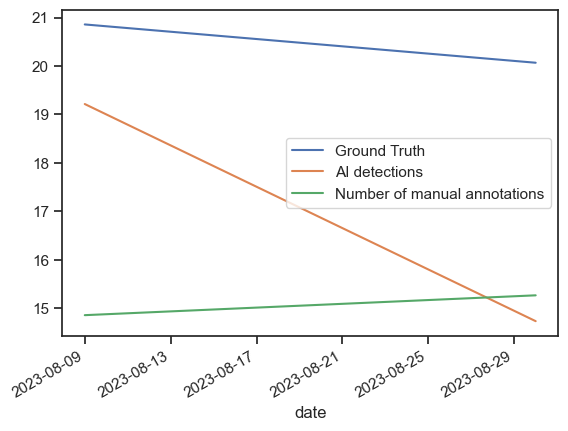

In [13]:
Dunkelfelder_df.groupby('date')['Ground Truth','AI detections','Number of manual annotations'].mean().plot();

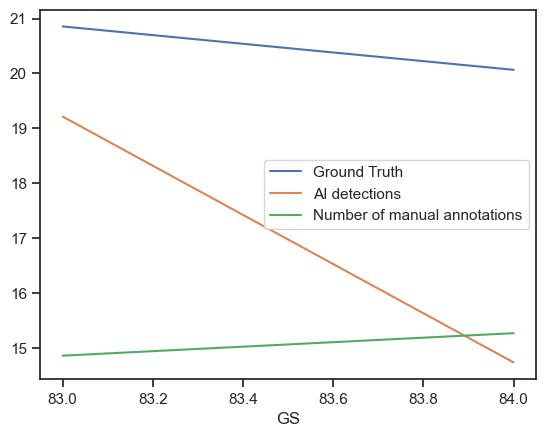

In [14]:
Dunkelfelder_df.groupby('GS')['Ground Truth','AI detections','Number of manual annotations'].mean().plot();

### Scatterplot

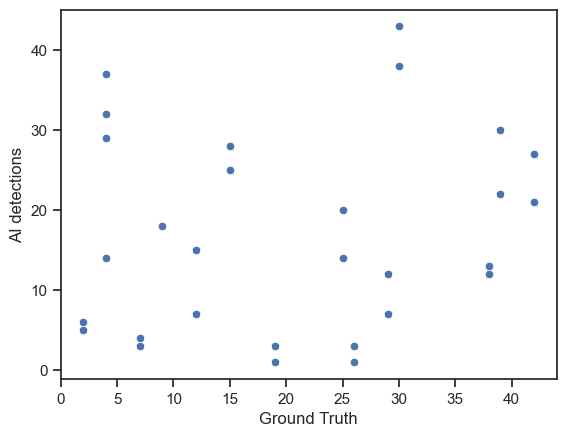

In [15]:
sns.scatterplot(x = Dunkelfelder_df['Ground Truth'], y = Dunkelfelder_df['AI detections']);

# Merlot

In [16]:
Merlot_df=df[df['variety']==2]

### Boxplot

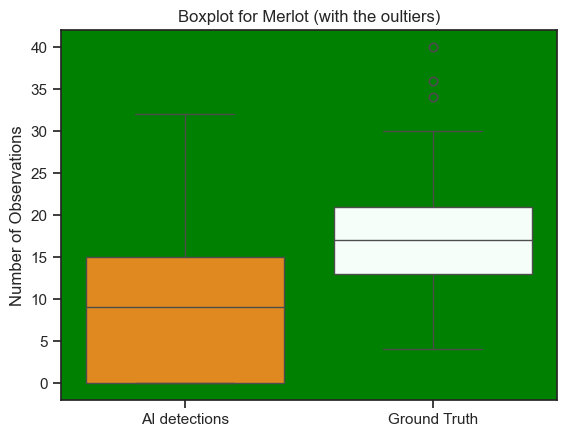

In [17]:
columns_to_plot =['AI detections','Ground Truth']
sns.set(style="ticks")
box_colors = ["darkorange","mintcream"]
ax = sns.boxplot(data=Merlot_df[columns_to_plot], palette=box_colors)
ax.set_facecolor("green")
ax.set_title('Boxplot for Merlot (with the oultiers)')
ax.set_ylabel('Number of Observations')
plt.savefig("Boxplot_Merlot_with_outliers.png")
plt.show()

### Pairplot

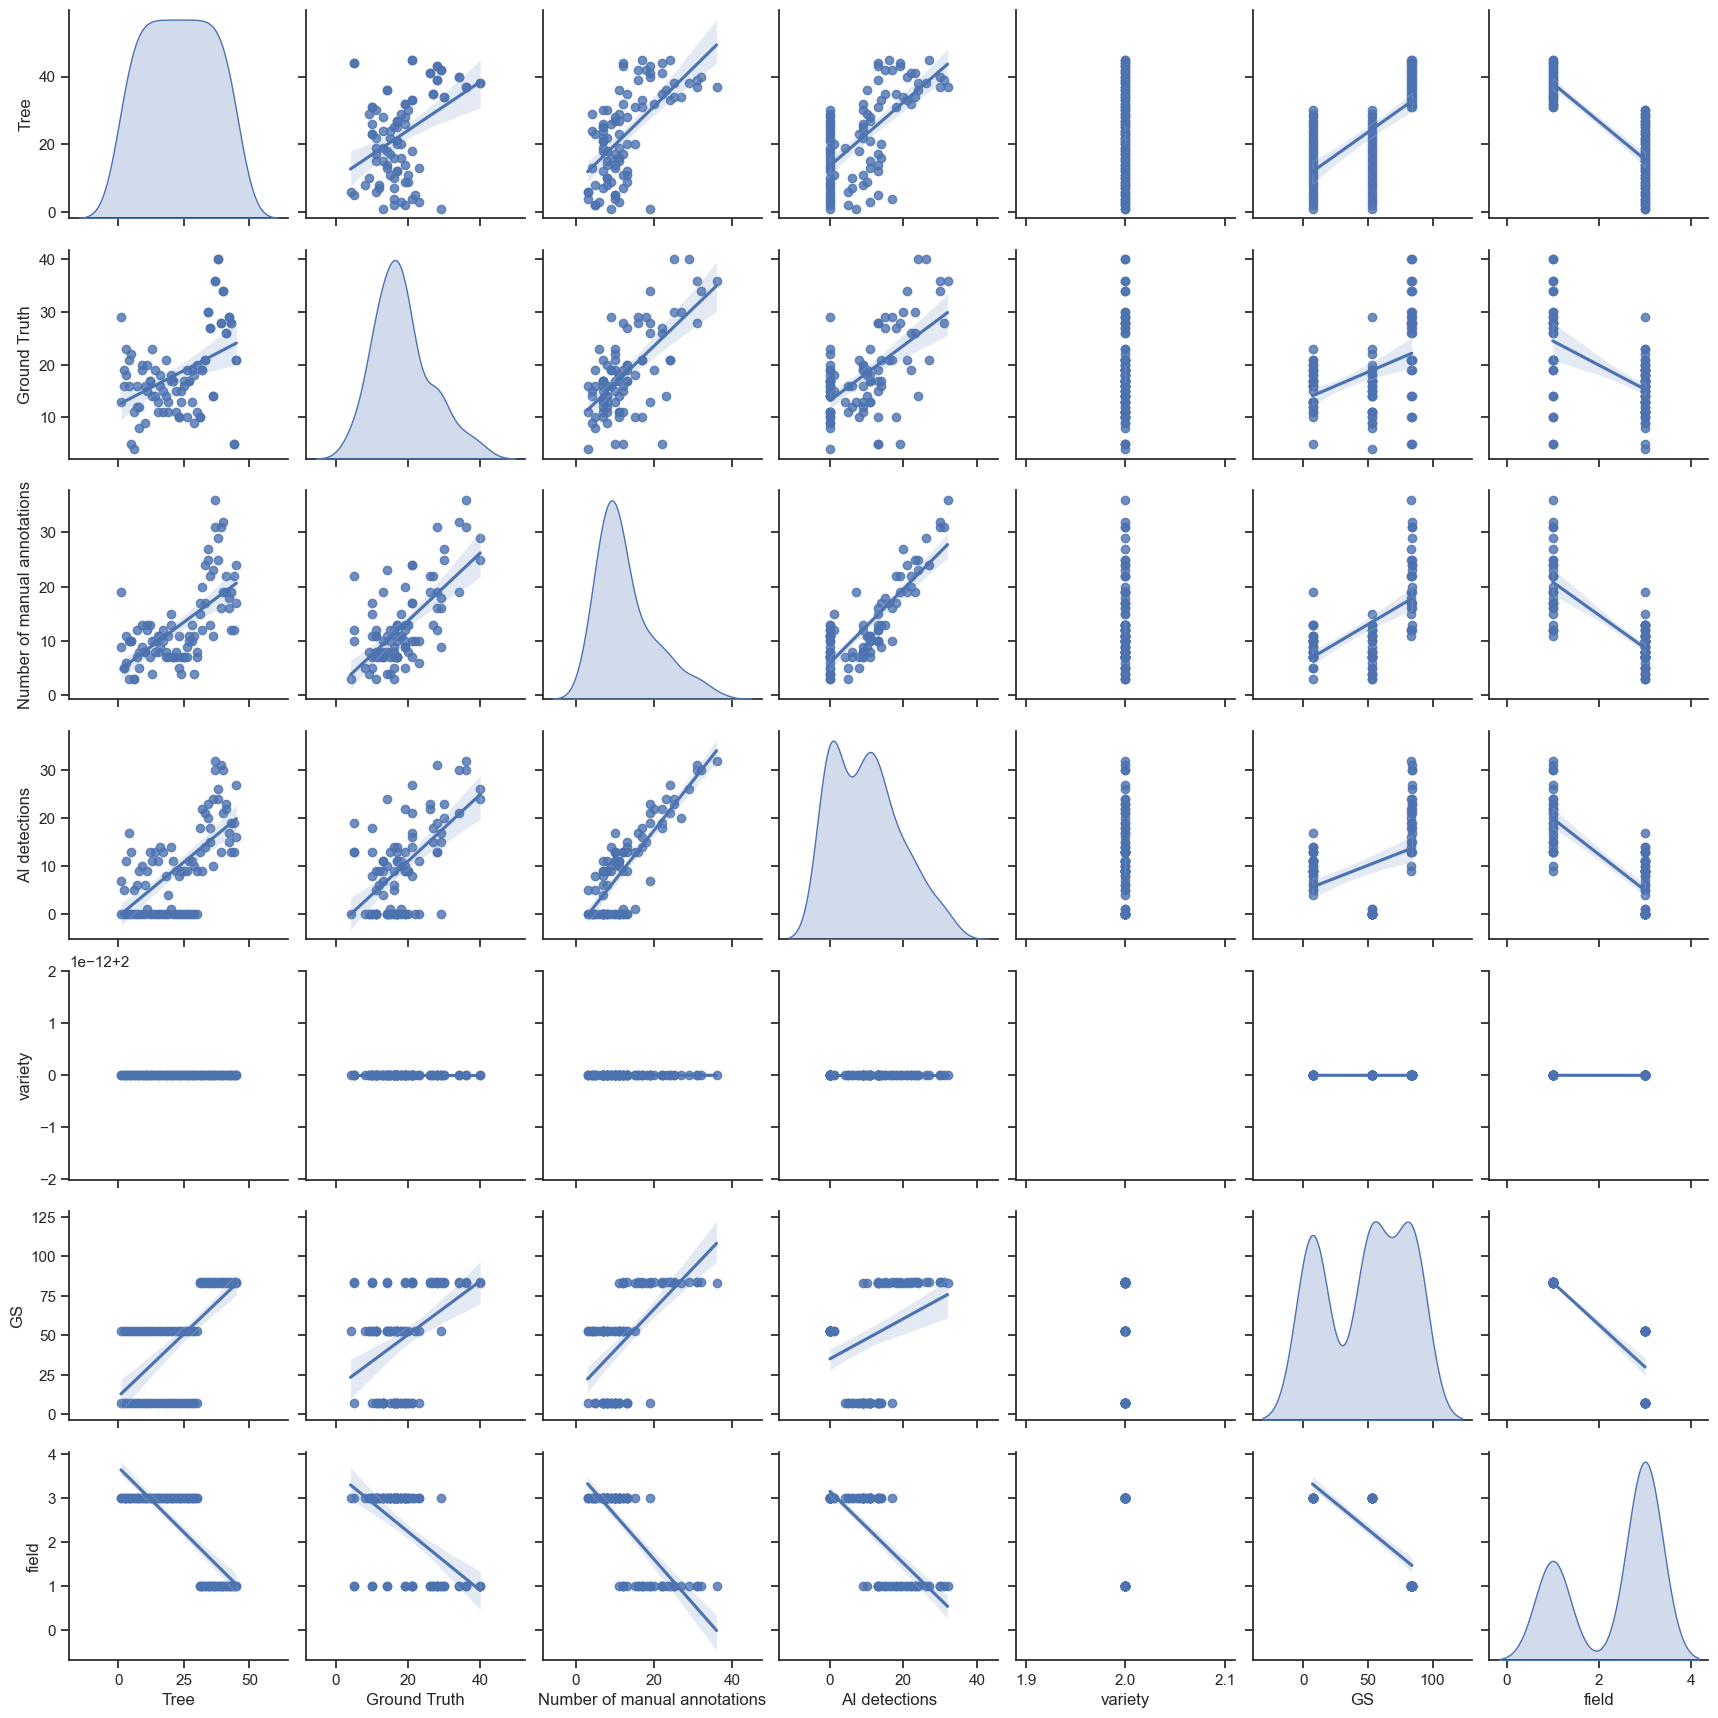

In [18]:
sns.pairplot(Merlot_df,kind='reg',diag_kind='kde');

### Lineplots

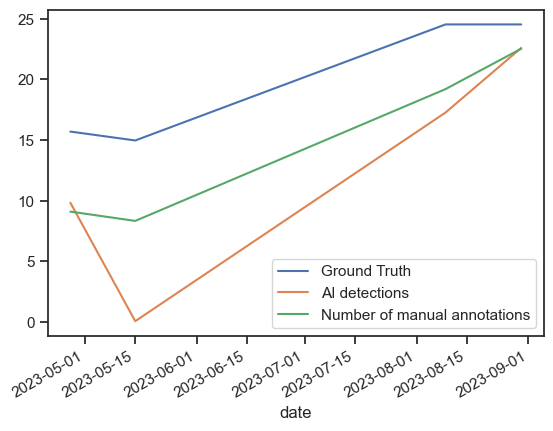

In [19]:
Merlot_df.groupby('date')['Ground Truth','AI detections','Number of manual annotations'].mean().plot();

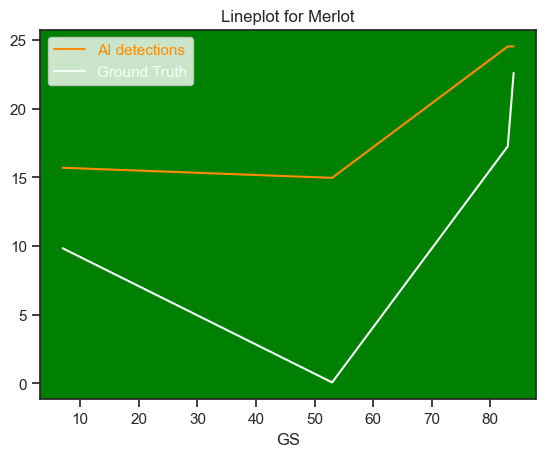

In [20]:
grouped_data = Merlot_df.groupby('GS')['Ground Truth','AI detections'].mean()
ax = grouped_data.plot()
line_colors = ["darkorange","mintcream"]
for i, line in enumerate(ax.lines):
    line.set_color(line_colors[i])
ax.patch.set_facecolor('green')
legend_labels = ['AI detections','Ground Truth']
for i, text in enumerate(ax.legend().get_texts()):
    text.set_color(line_colors[i])
    text.set_text(legend_labels[i])
plt.title('Lineplot for Merlot')
plt.savefig("Lineplot for Merlot.png")
plt.show()

### Scatterplot

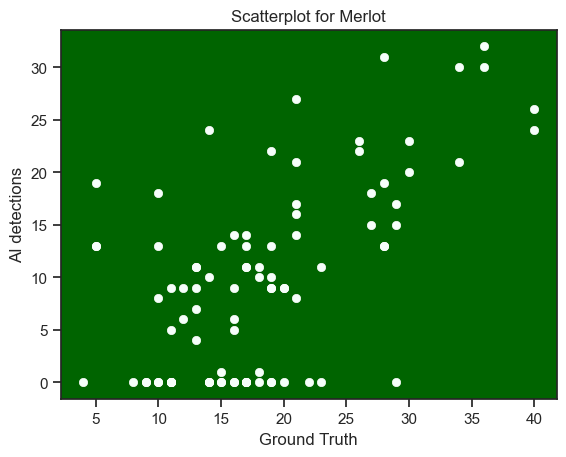

In [21]:
marker_color = ["mintcream"]
sns.scatterplot(x = Merlot_df['Ground Truth'], y = Merlot_df['AI detections'],color=marker_color)
plt.title('Scatterplot for Merlot')
plt.gca().set_facecolor("darkgreen")
plt.savefig("Merlot_Scatterplot.png")
plt.show()

## Merlot after handling the outliers with IsolationForest

In [22]:
date=Merlot_df['date']
Merlot_df.drop(columns=['date'],inplace=True)

In [23]:
iforest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iforest.fit(Merlot_df)

IsolationForest(random_state=42)

In [24]:
pred = iforest.predict(Merlot_df)
scores = iforest.decision_function(Merlot_df)

In [25]:
Merlot_df['scores'] = scores
Merlot_df['anomaly_label'] = pred
Merlot_df['anomaly'] = Merlot_df['anomaly_label'].apply(lambda x: 'outlier' if x == -1 else 'inlier')
Merlot_df= Merlot_df[Merlot_df['anomaly']=='inlier']
Merlot_df['date']=date

### Boxplot

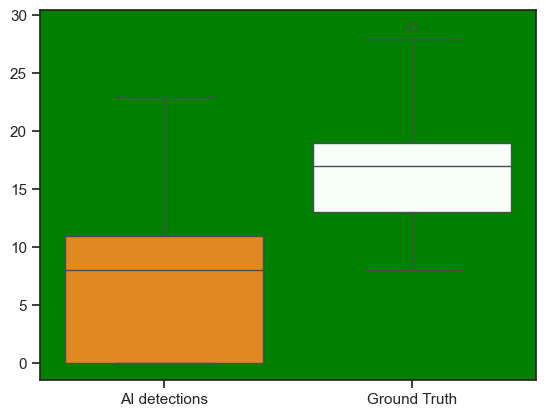

In [26]:
columns_to_plot =['AI detections','Ground Truth']
sns.set(style="ticks")
box_colors = ["darkorange","mintcream"]
ax = sns.boxplot(data=Merlot_df[columns_to_plot], palette=box_colors)
ax.set_facecolor("green")
plt.show()

### Pairplot

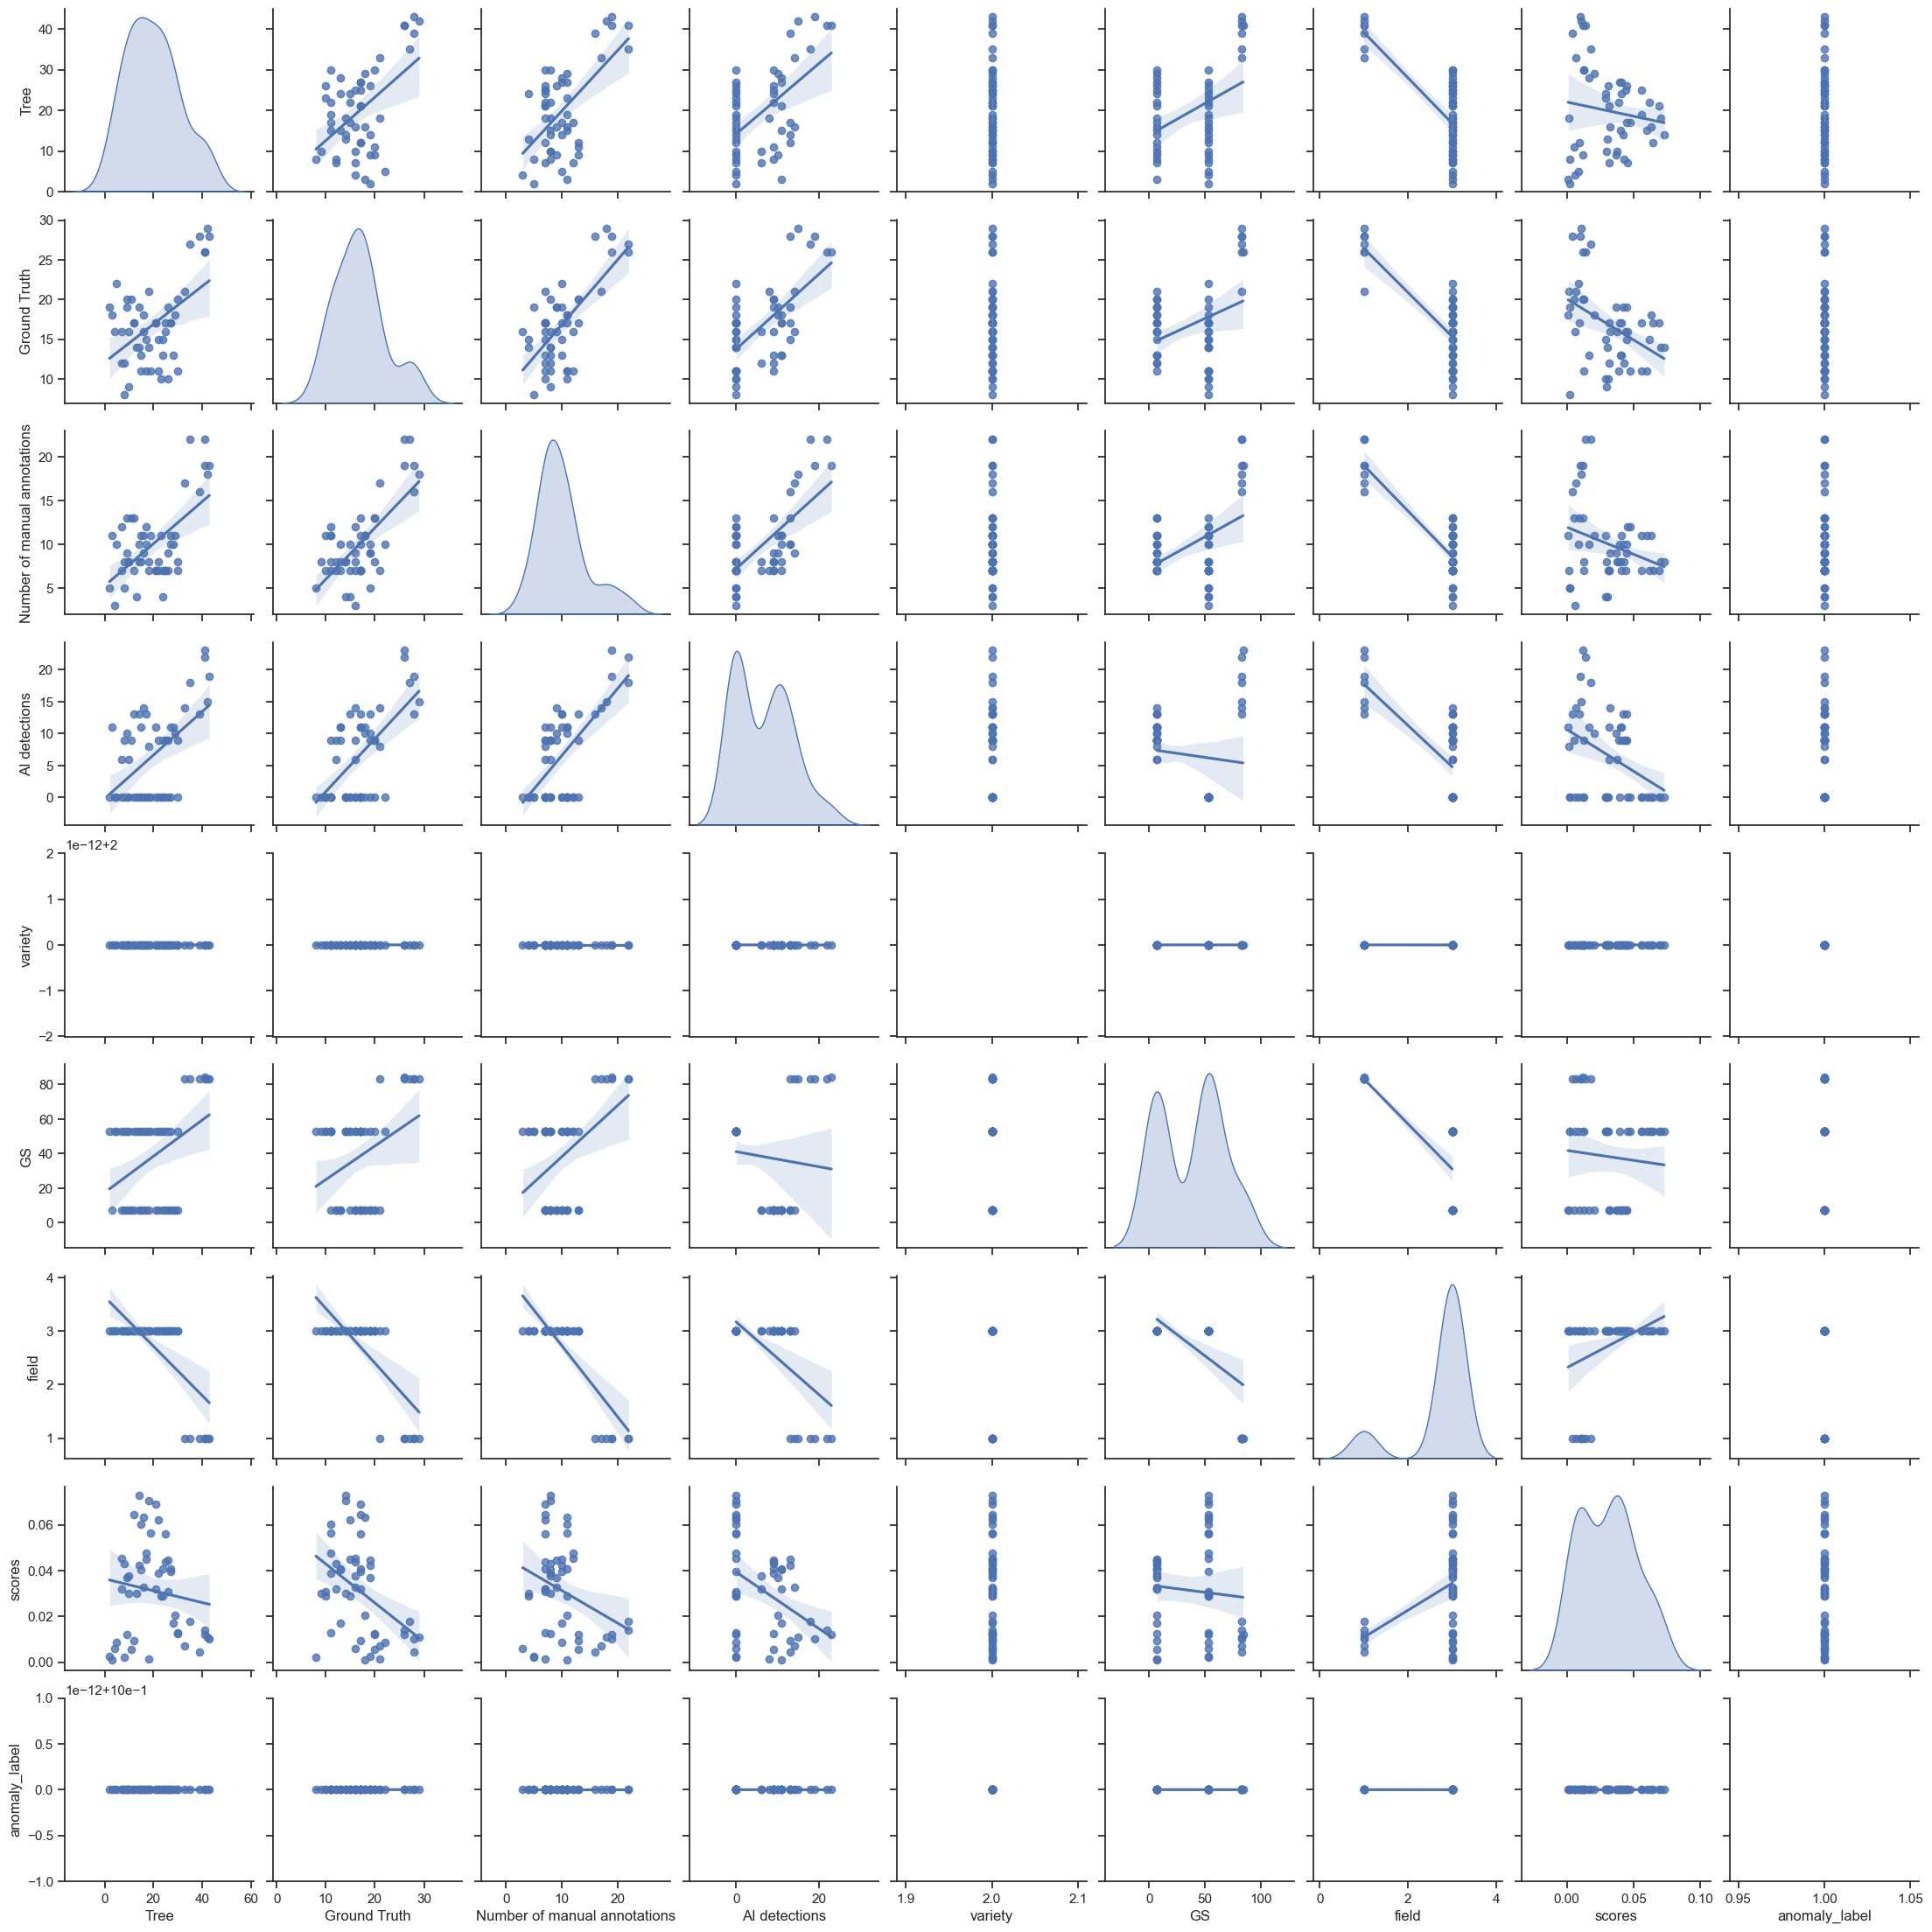

In [27]:
sns.pairplot(Merlot_df,kind='reg',diag_kind='kde');

### Lineplots

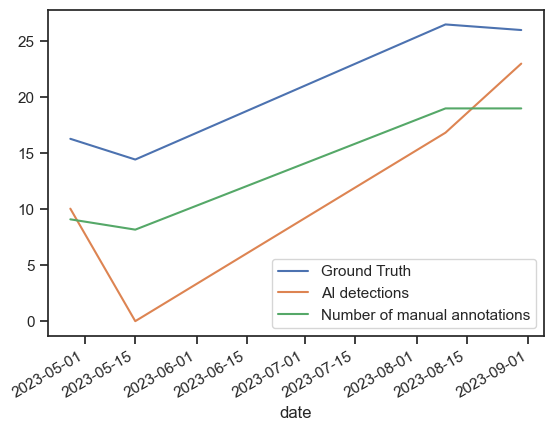

In [28]:
Merlot_df.groupby('date')['Ground Truth','AI detections','Number of manual annotations'].mean().plot();

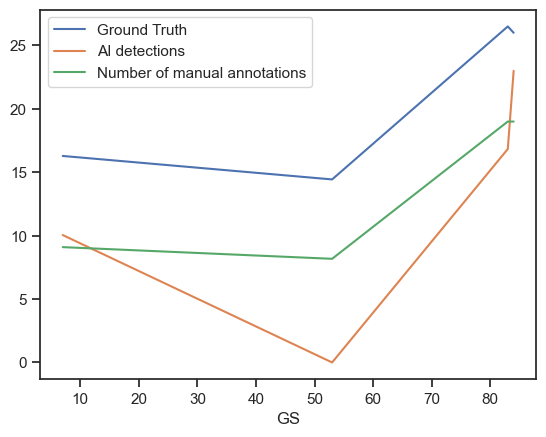

In [69]:
Merlot_df.groupby('GS')['Ground Truth','AI detections','Number of manual annotations'].mean().plot();

### Scatterplot

Text(0.5, 1.0, 'Scatterplot for Merlot')

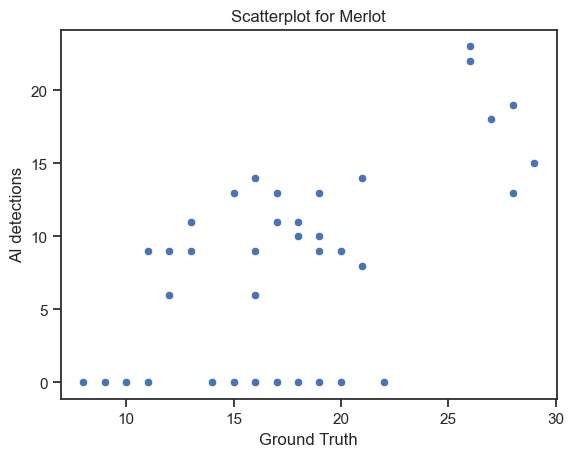

In [30]:
sns.scatterplot(x = Merlot_df['Ground Truth'], y = Merlot_df['AI detections'])
plt.title('Scatterplot for Merlot')

# Moschofilero

In [31]:
Moschofilero_df=df[df['variety']==3]

### Boxplot

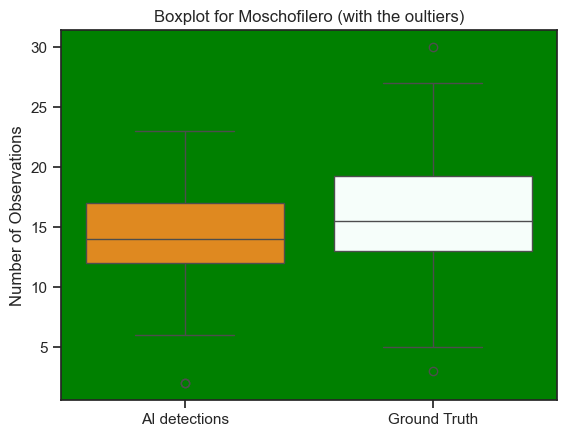

In [32]:
columns_to_plot =['AI detections','Ground Truth']
sns.set(style="ticks")
box_colors = ["darkorange","mintcream"]
ax = sns.boxplot(data=Moschofilero_df[columns_to_plot], palette=box_colors)
ax.set_facecolor("green")
ax.set_title('Boxplot for Moschofilero (with the oultiers)')
ax.set_ylabel('Number of Observations')
plt.savefig("Moschofilero_boxplot.png")
plt.show()

### Pairplot

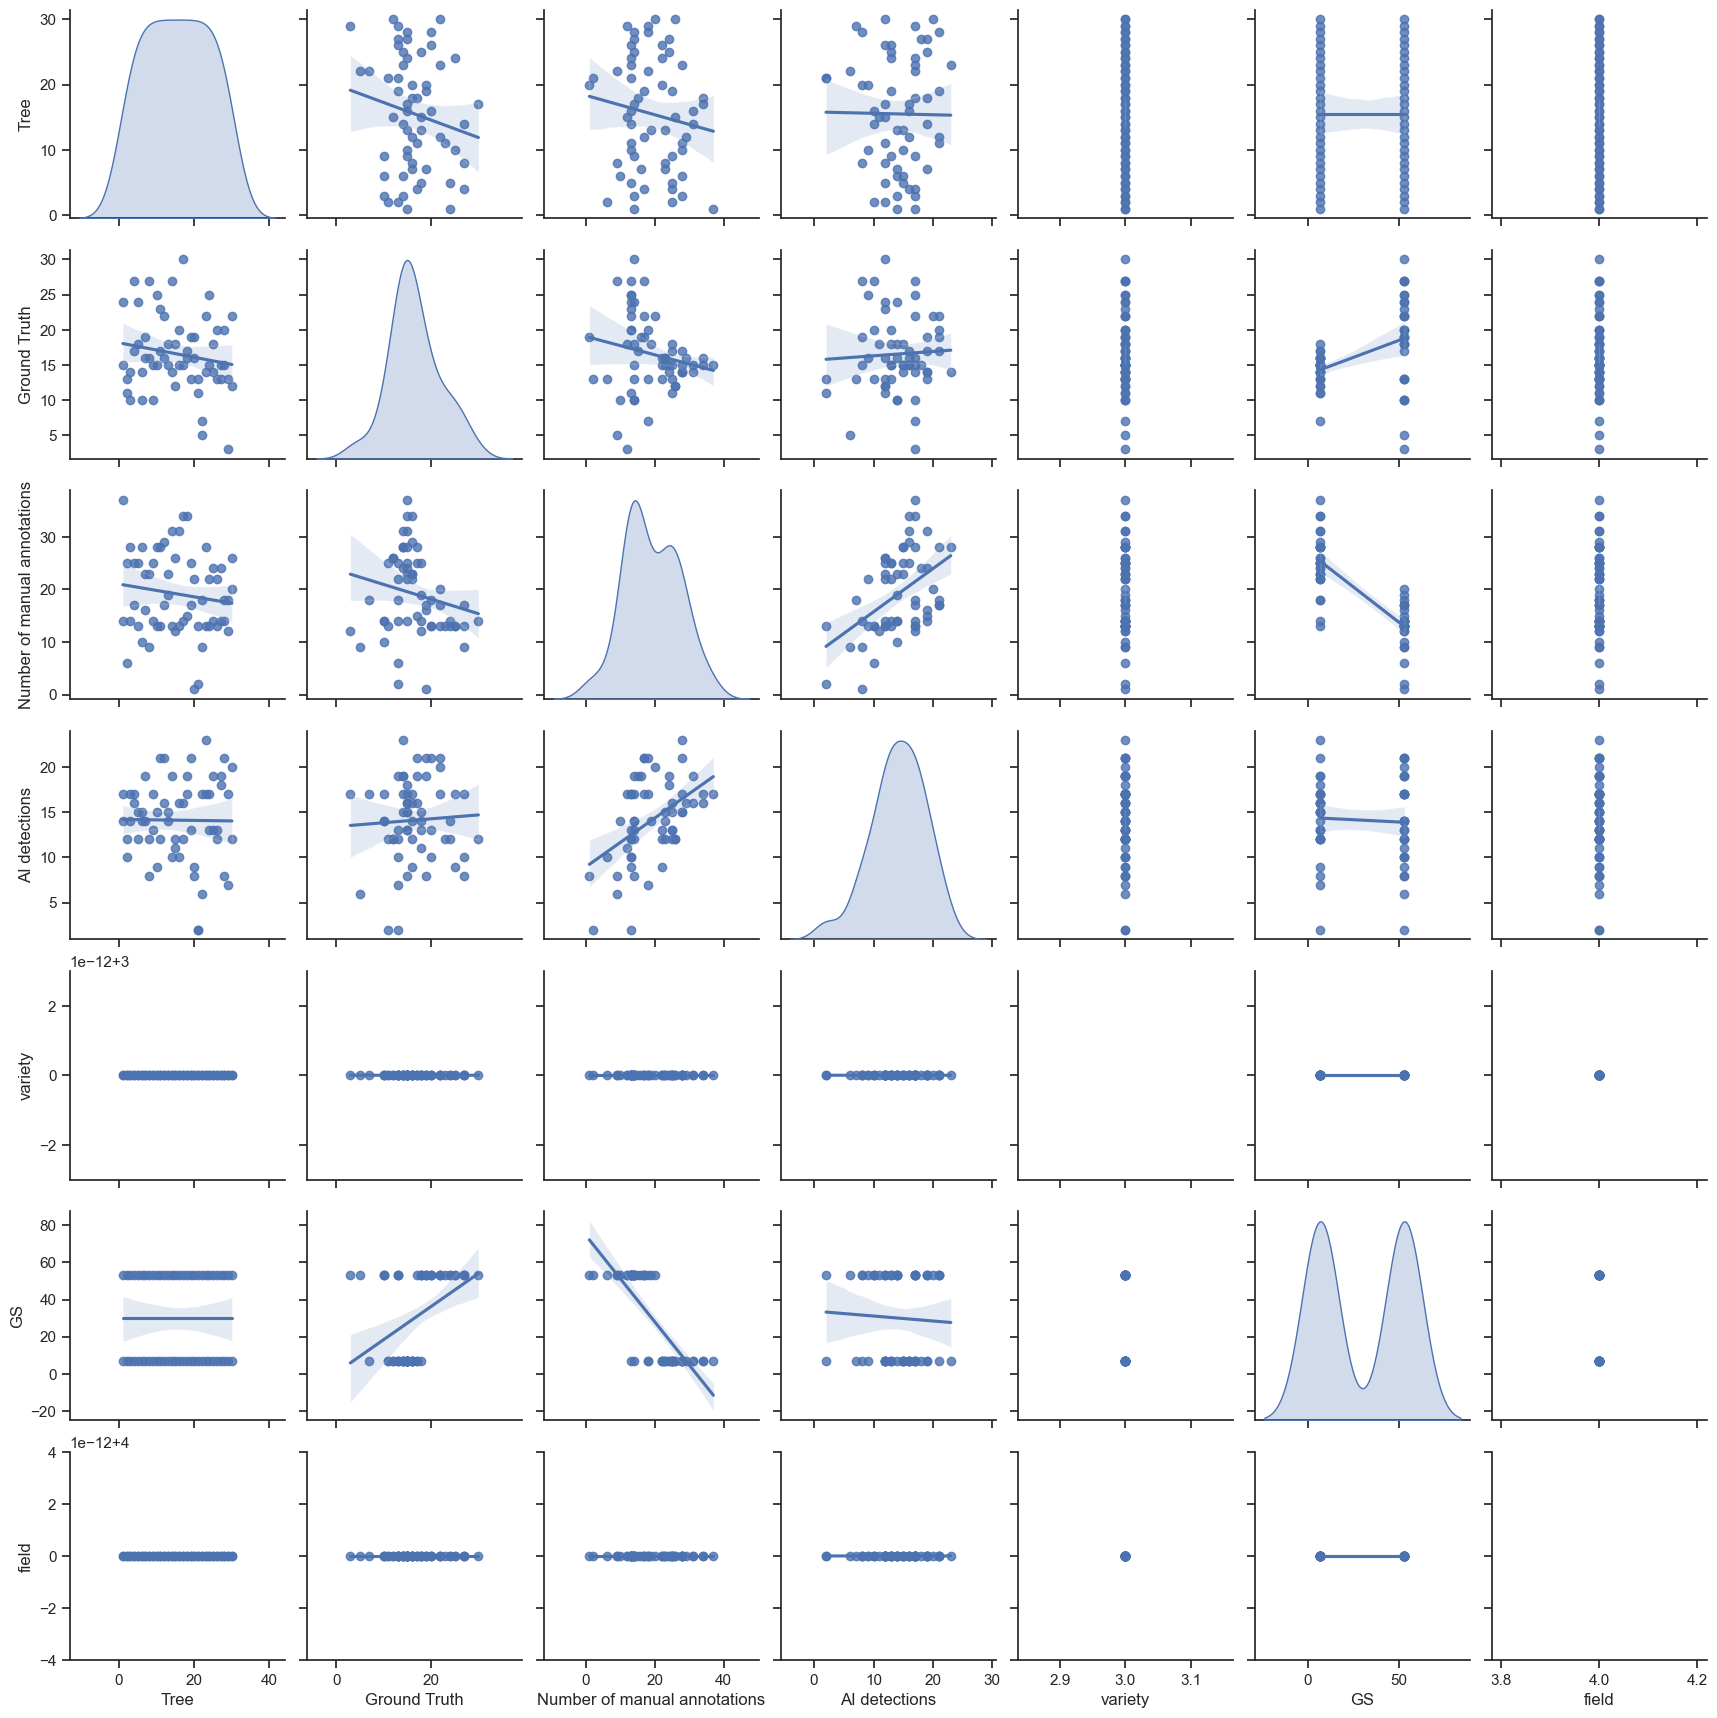

In [33]:
sns.pairplot(Moschofilero_df,kind='reg',diag_kind='kde');

### Lineplots

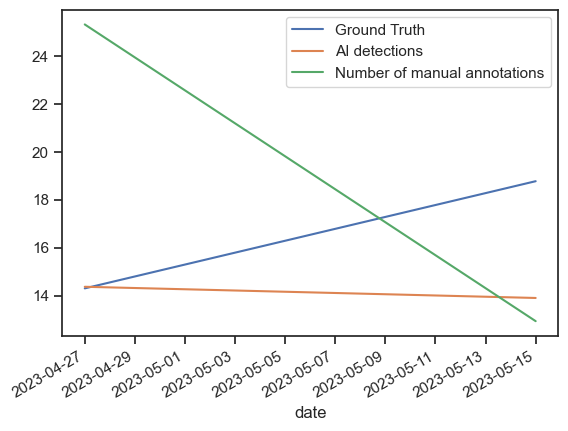

In [34]:
Moschofilero_df.groupby('date')['Ground Truth','AI detections','Number of manual annotations'].mean().plot();

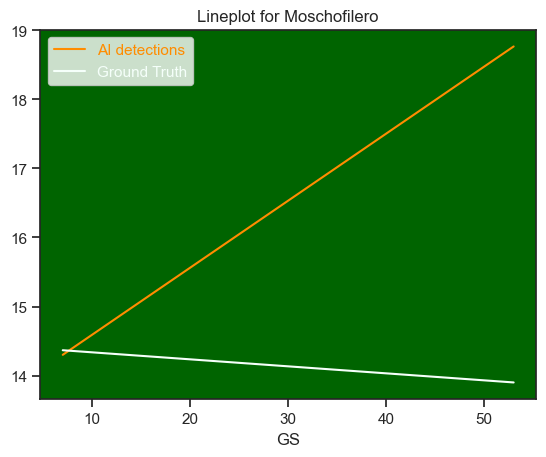

In [35]:
grouped_data = Moschofilero_df.groupby('GS')['Ground Truth','AI detections'].mean()
ax = grouped_data.plot()
line_colors = ['darkorange', 'mintcream']
for i, line in enumerate(ax.lines):
    line.set_color(line_colors[i])
ax.patch.set_facecolor('darkgreen')
legend_labels = ['AI detections','Ground Truth']
for i, text in enumerate(ax.legend().get_texts()):
    text.set_color(line_colors[i])
    text.set_text(legend_labels[i])
plt.title('Lineplot for Moschofilero')
plt.savefig("Lineplot for Moschofilero.png")
plt.show()

### Scatterplot

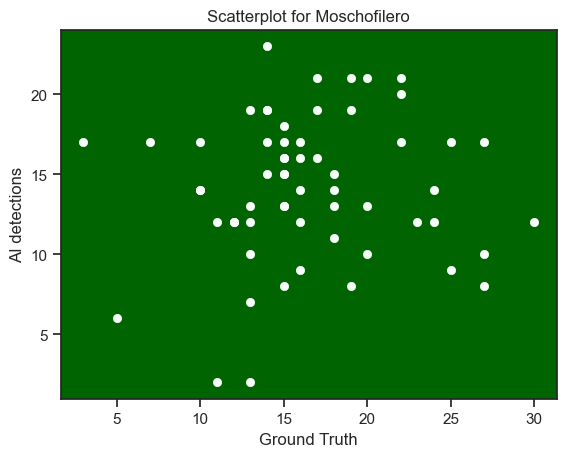

In [36]:
marker_color = ["mintcream"]
sns.scatterplot(x = Moschofilero_df['Ground Truth'], y = Moschofilero_df['AI detections'],color=marker_color)
plt.title('Scatterplot for Moschofilero')
plt.gca().set_facecolor("darkgreen")
plt.savefig("Moschofilero_scatterplot.png")
plt.show()

# Pinot

In [37]:
Pinot_df=df[df['variety']==4]

### Boxplot

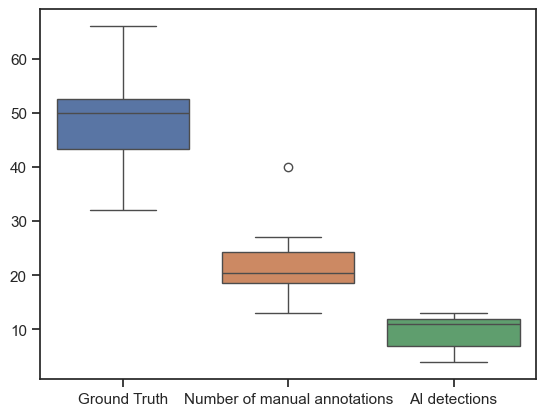

In [38]:
columns_for_boxplot = ['Ground Truth', 'Number of manual annotations',"AI detections"]
sns.boxplot(data=Pinot_df[columns_for_boxplot])
plt.show()

### Pairplot

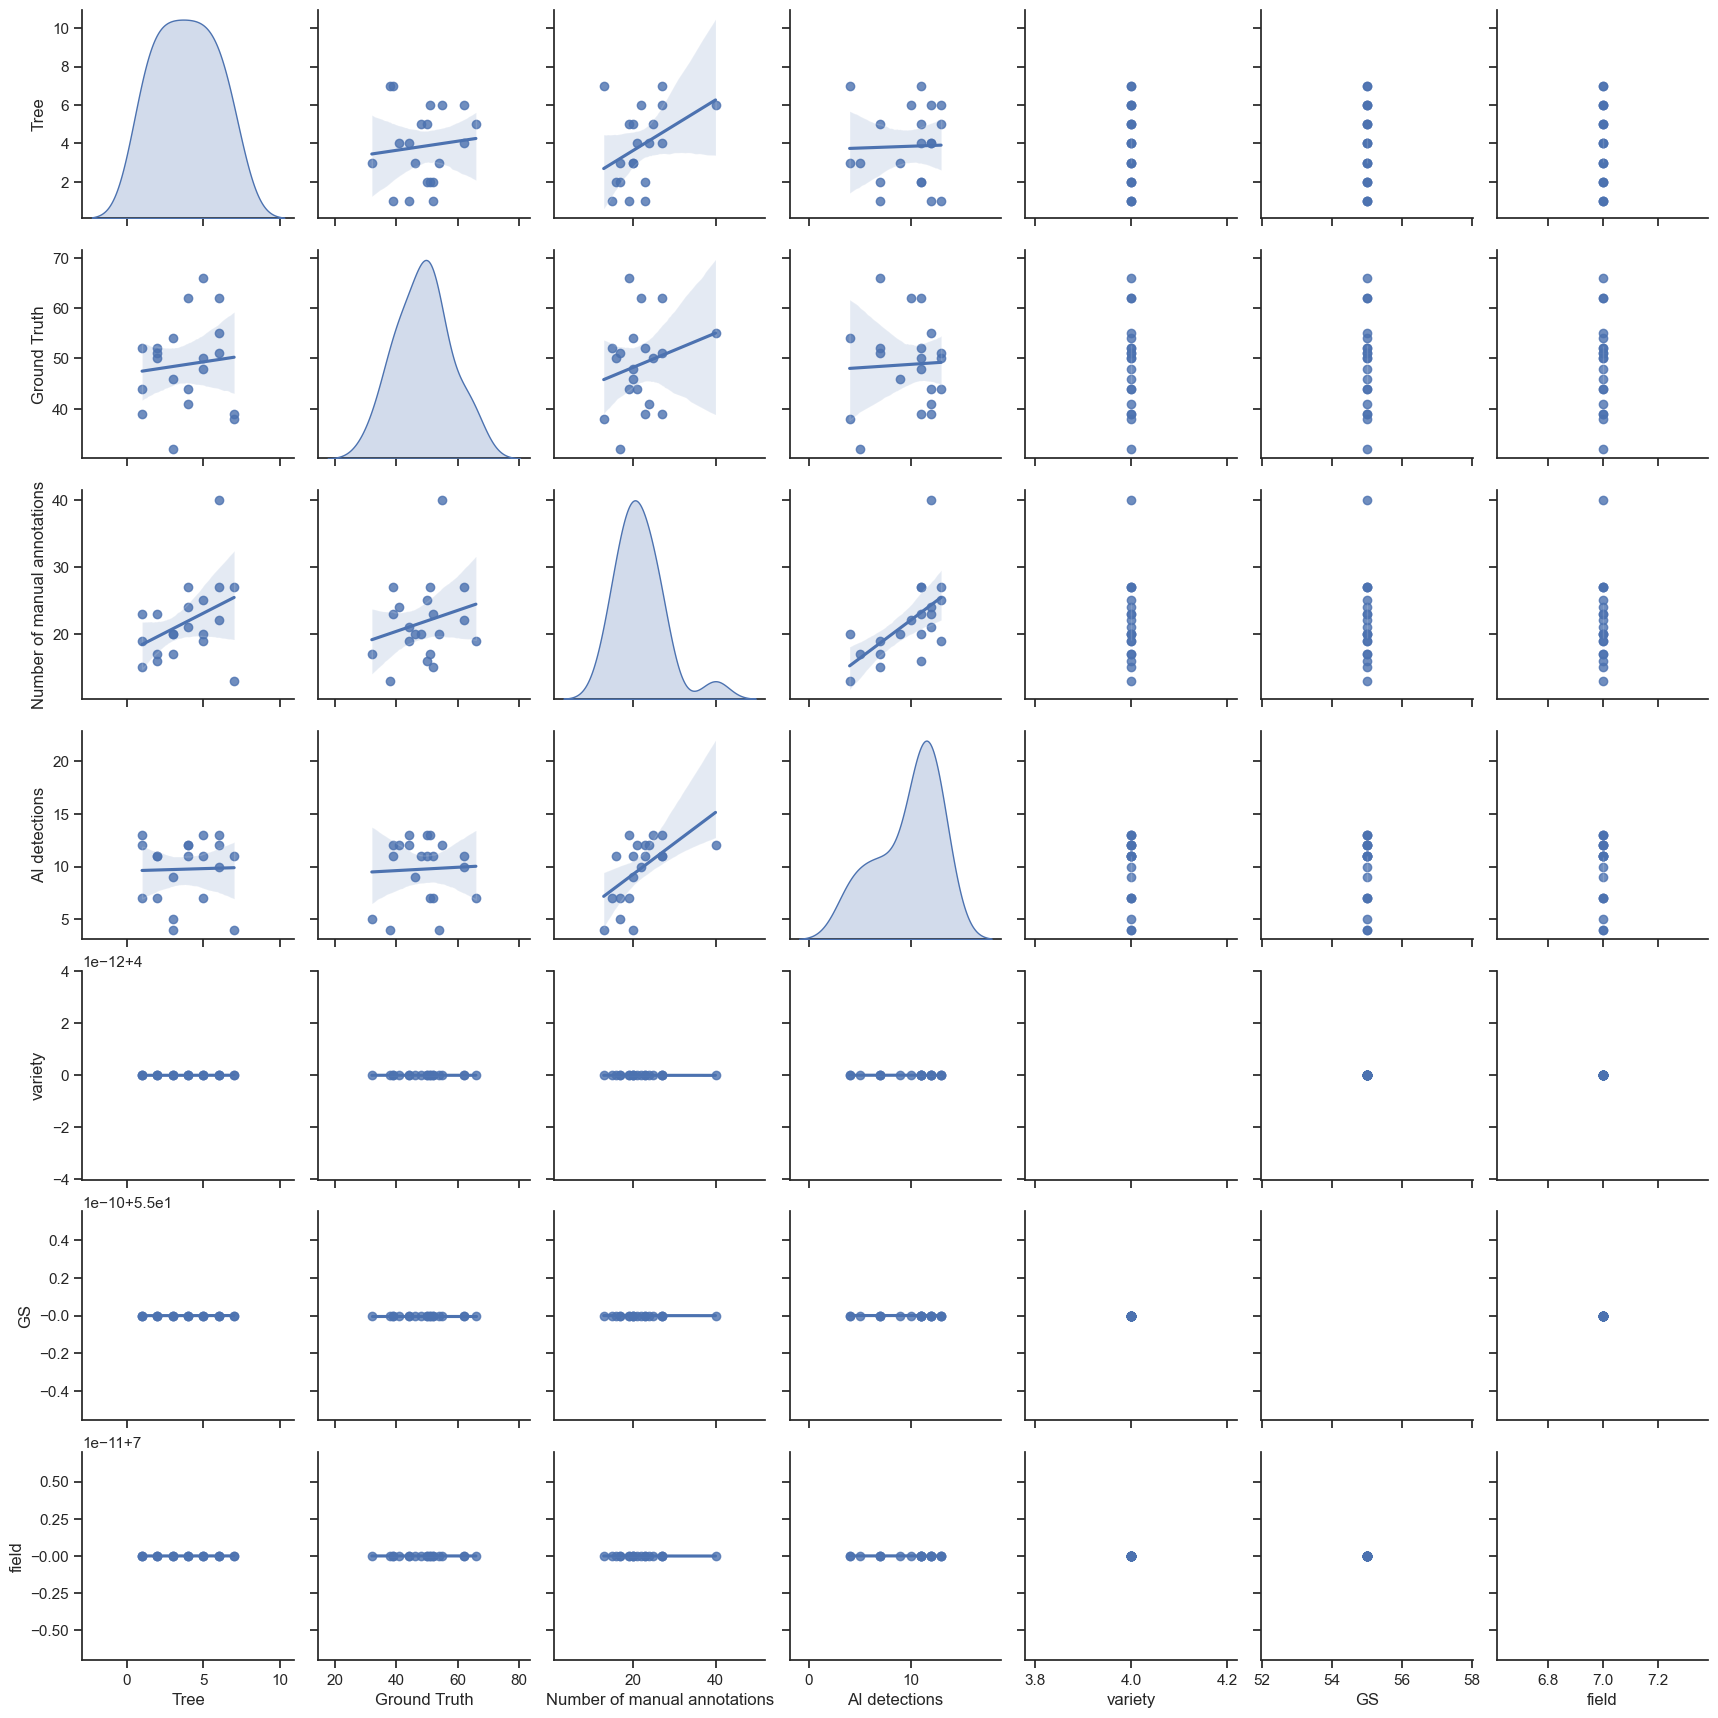

In [39]:
sns.pairplot(Pinot_df,kind='reg',diag_kind='kde');

### Lineplots

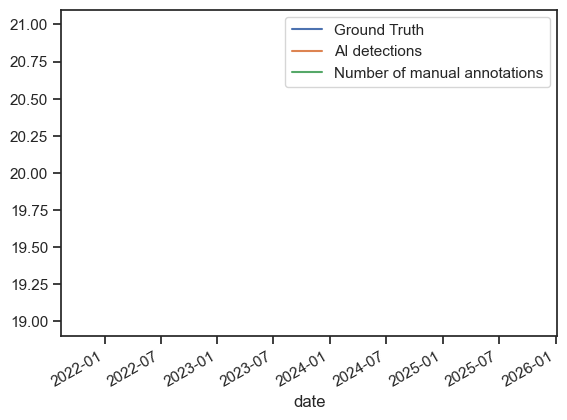

In [40]:
# No results due to low volume of values
Pinot_df.groupby('date')['Ground Truth','AI detections','Number of manual annotations'].count().plot();

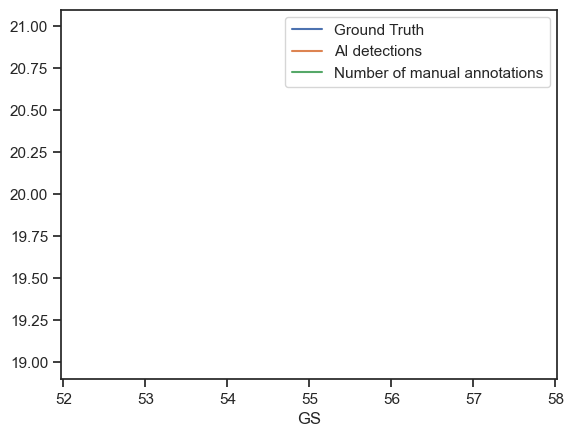

In [41]:
# No results due to low volume of values
Pinot_df.groupby('GS')['Ground Truth','AI detections','Number of manual annotations'].count().plot();

### Scatterplot

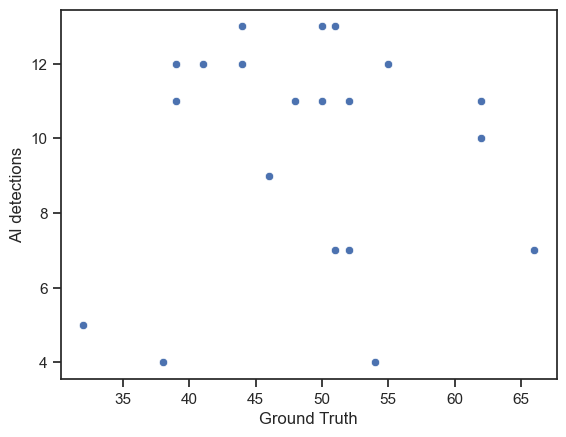

In [42]:
sns.scatterplot(x = Pinot_df['Ground Truth'], y = Pinot_df['AI detections']);

# Portygieser

In [43]:
Portygieser_df=df[df['variety']==5]

### Boxplot

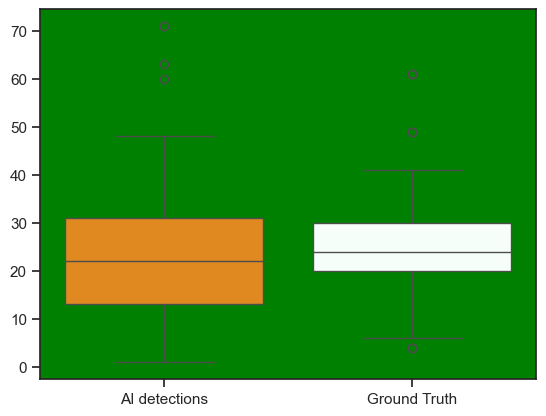

In [44]:
columns_to_plot =['AI detections','Ground Truth']
sns.set(style="ticks")
box_colors = ["darkorange","mintcream"]
ax = sns.boxplot(data=Portygieser_df[columns_to_plot], palette=box_colors)
ax.set_facecolor("green")
plt.show()

### Pairplot

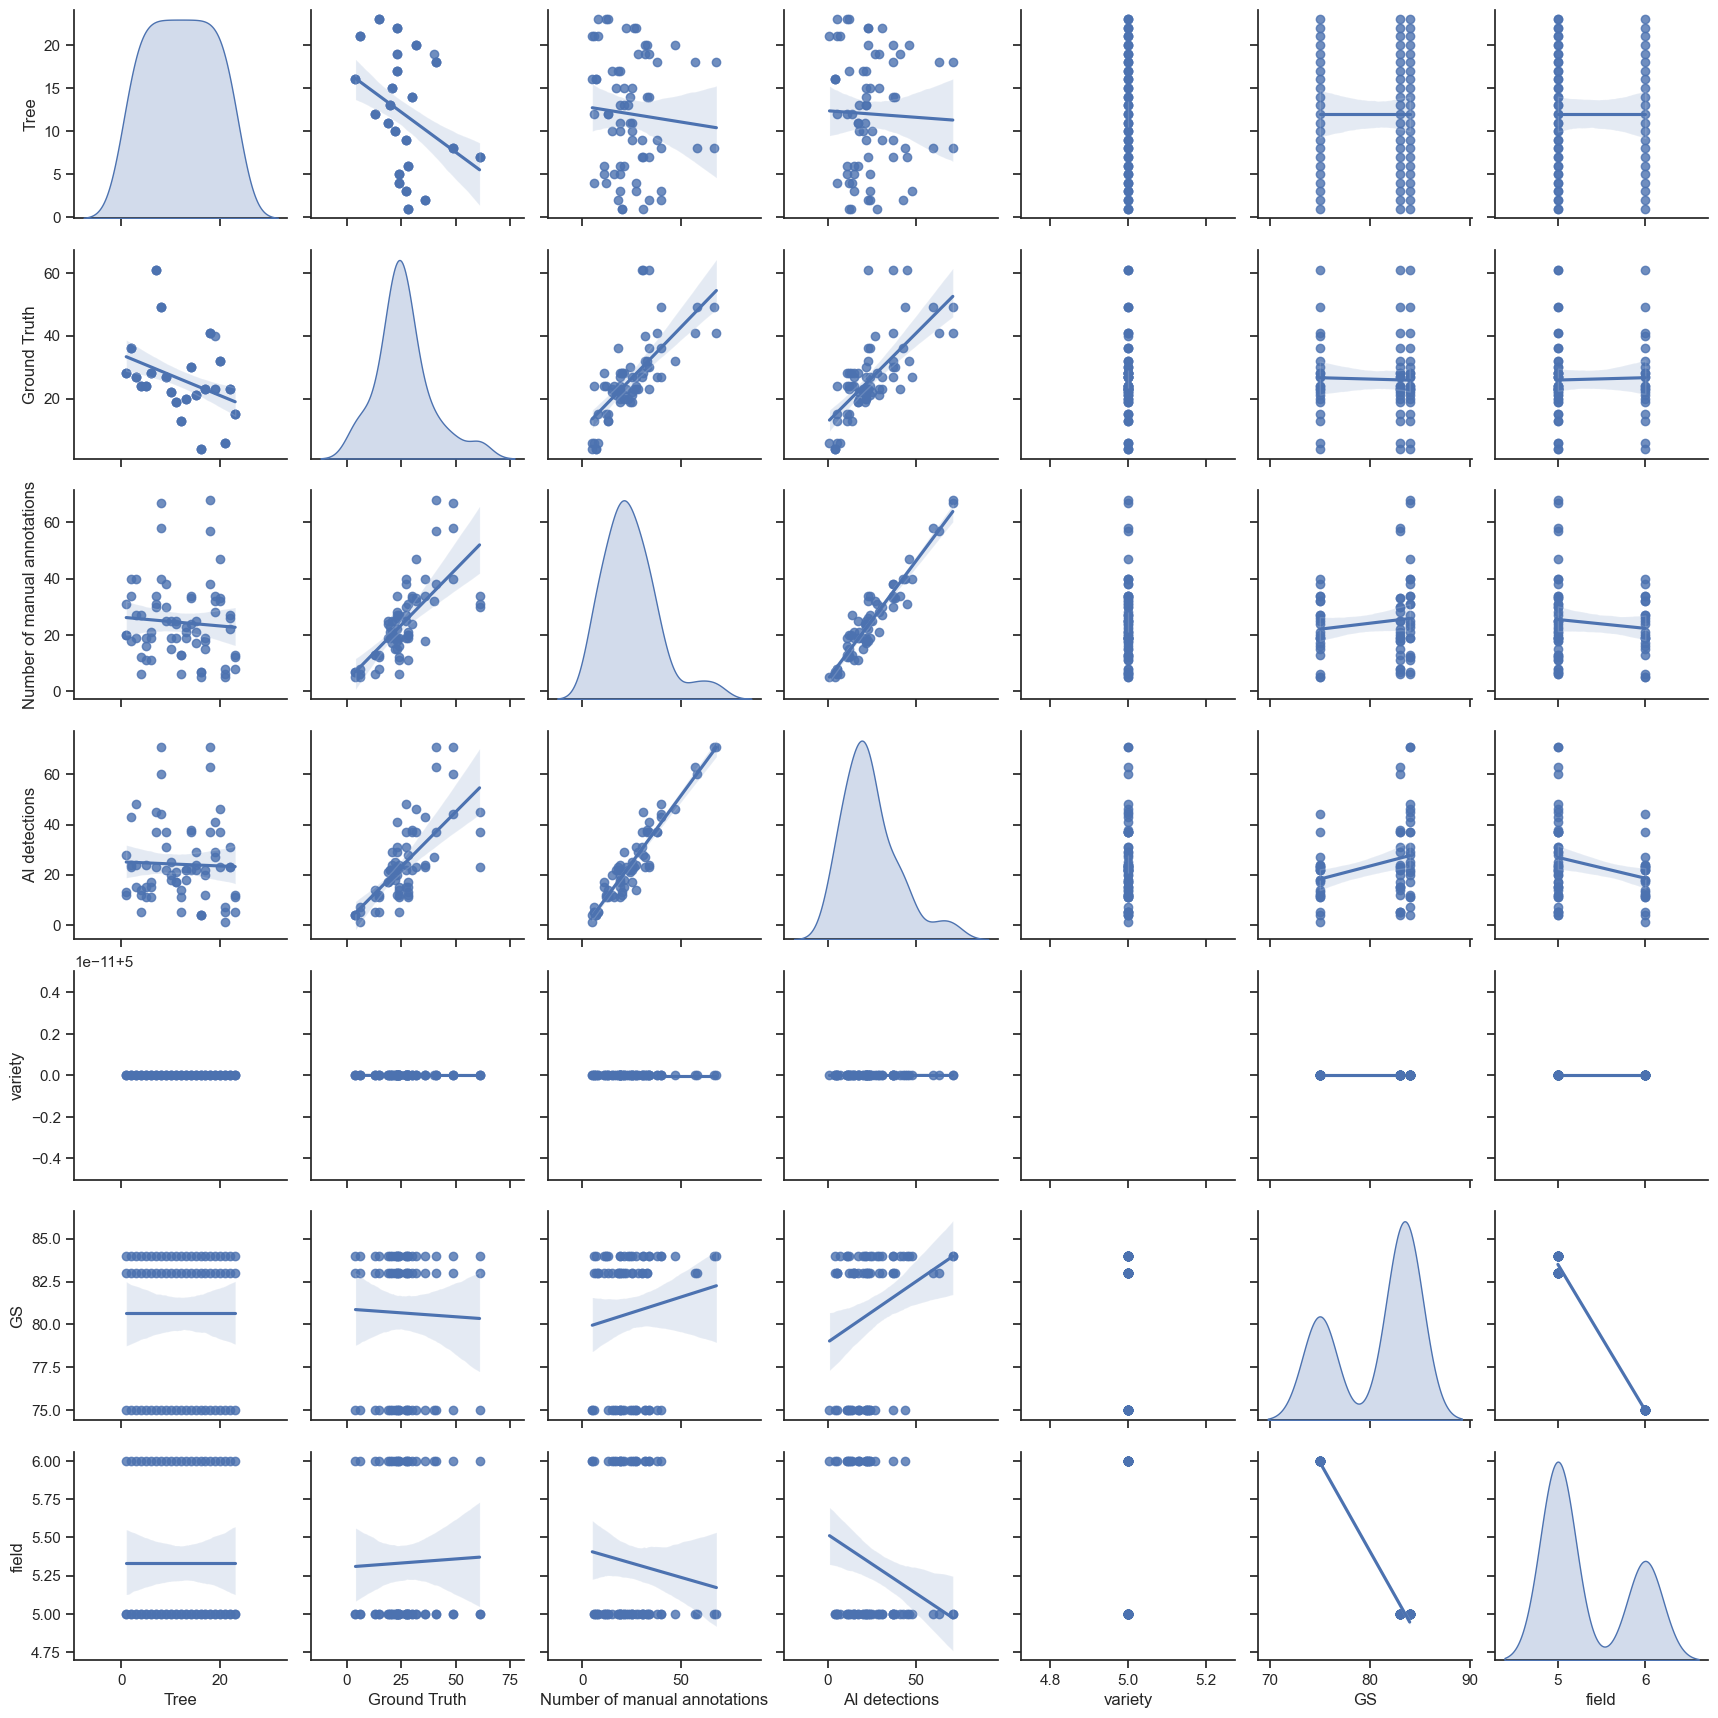

In [45]:
sns.pairplot(Portygieser_df,kind='reg',diag_kind='kde');

### Lineplots

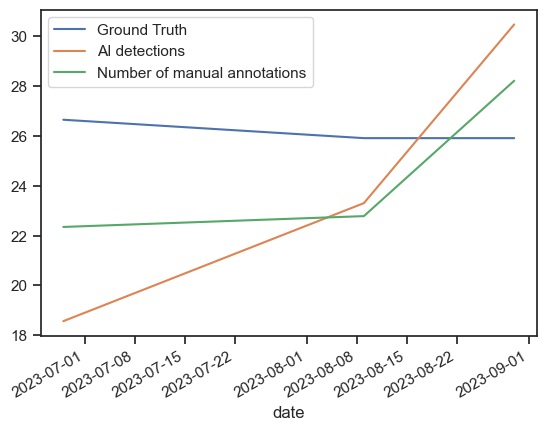

In [46]:
Portygieser_df.groupby('date')['Ground Truth','AI detections','Number of manual annotations'].mean().plot();

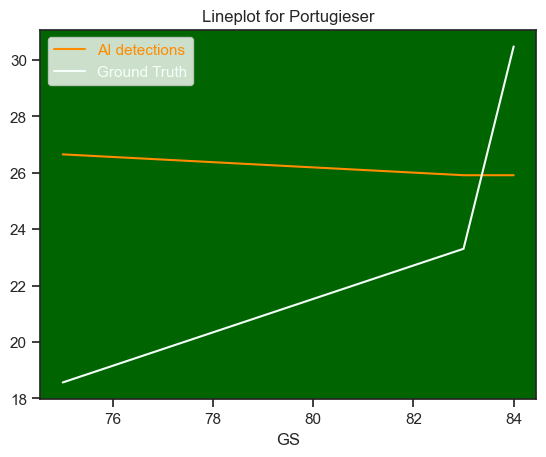

In [47]:
grouped_data = Portygieser_df.groupby('GS')['Ground Truth','AI detections'].mean()
ax = grouped_data.plot()
line_colors = ['darkorange', 'mintcream']
for i, line in enumerate(ax.lines):
    line.set_color(line_colors[i])
ax.patch.set_facecolor('darkgreen')
legend_labels = ['AI detections','Ground Truth']
for i, text in enumerate(ax.legend().get_texts()):
    text.set_color(line_colors[i])
    text.set_text(legend_labels[i])
plt.title('Lineplot for Portugieser')
plt.savefig("Lineplot for Portugieser.png")
plt.show()

### Scatterplot

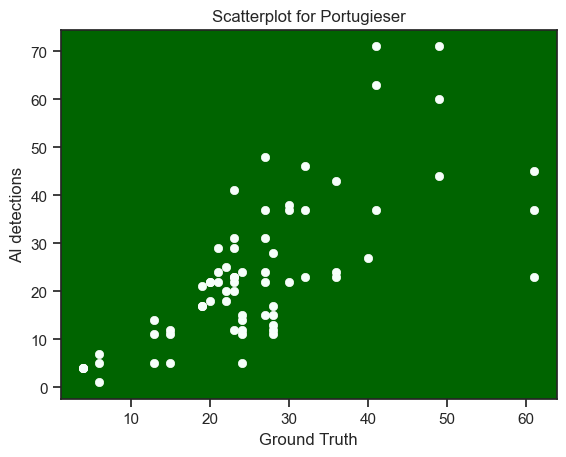

In [48]:
marker_color = ["mintcream"]
sns.scatterplot(x = Portygieser_df['Ground Truth'], y = Portygieser_df['AI detections'],color=marker_color)
plt.title('Scatterplot for Portugieser')
plt.gca().set_facecolor("darkgreen")
plt.savefig("Portugieser_Scatterplot.png")
plt.show()

## Portugieser after handling the outliers with LocalOutlierFactor

In [49]:
date=Portygieser_df['date']
Portygieser_df.drop(columns=['date'],inplace=True)

In [50]:
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
y_pred = lof.fit_predict(Portygieser_df)
lof_scores = lof.negative_outlier_factor_

In [51]:
Portygieser_df['lof_scores'] = lof_scores
Portygieser_df['lof_anomaly_label'] = y_pred
Portygieser_df['lof_anomaly'] = Portygieser_df['lof_anomaly_label'].apply(lambda x: 'outlier' if x == -1 else 'inlier')
Portygieser_df=Portygieser_df[Portygieser_df['lof_anomaly']=='inlier']
Portygieser_df['date']=date

### Boxplot

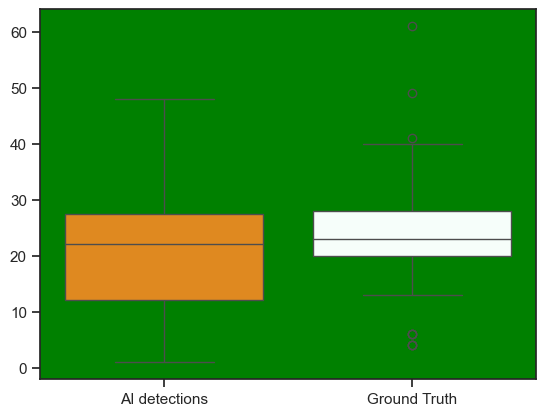

In [52]:
columns_to_plot =['AI detections','Ground Truth']
sns.set(style="ticks")
box_colors = ["darkorange","mintcream"]
ax = sns.boxplot(data=Portygieser_df[columns_to_plot], palette=box_colors)
ax.set_facecolor("green")
plt.show()

### Pairplot

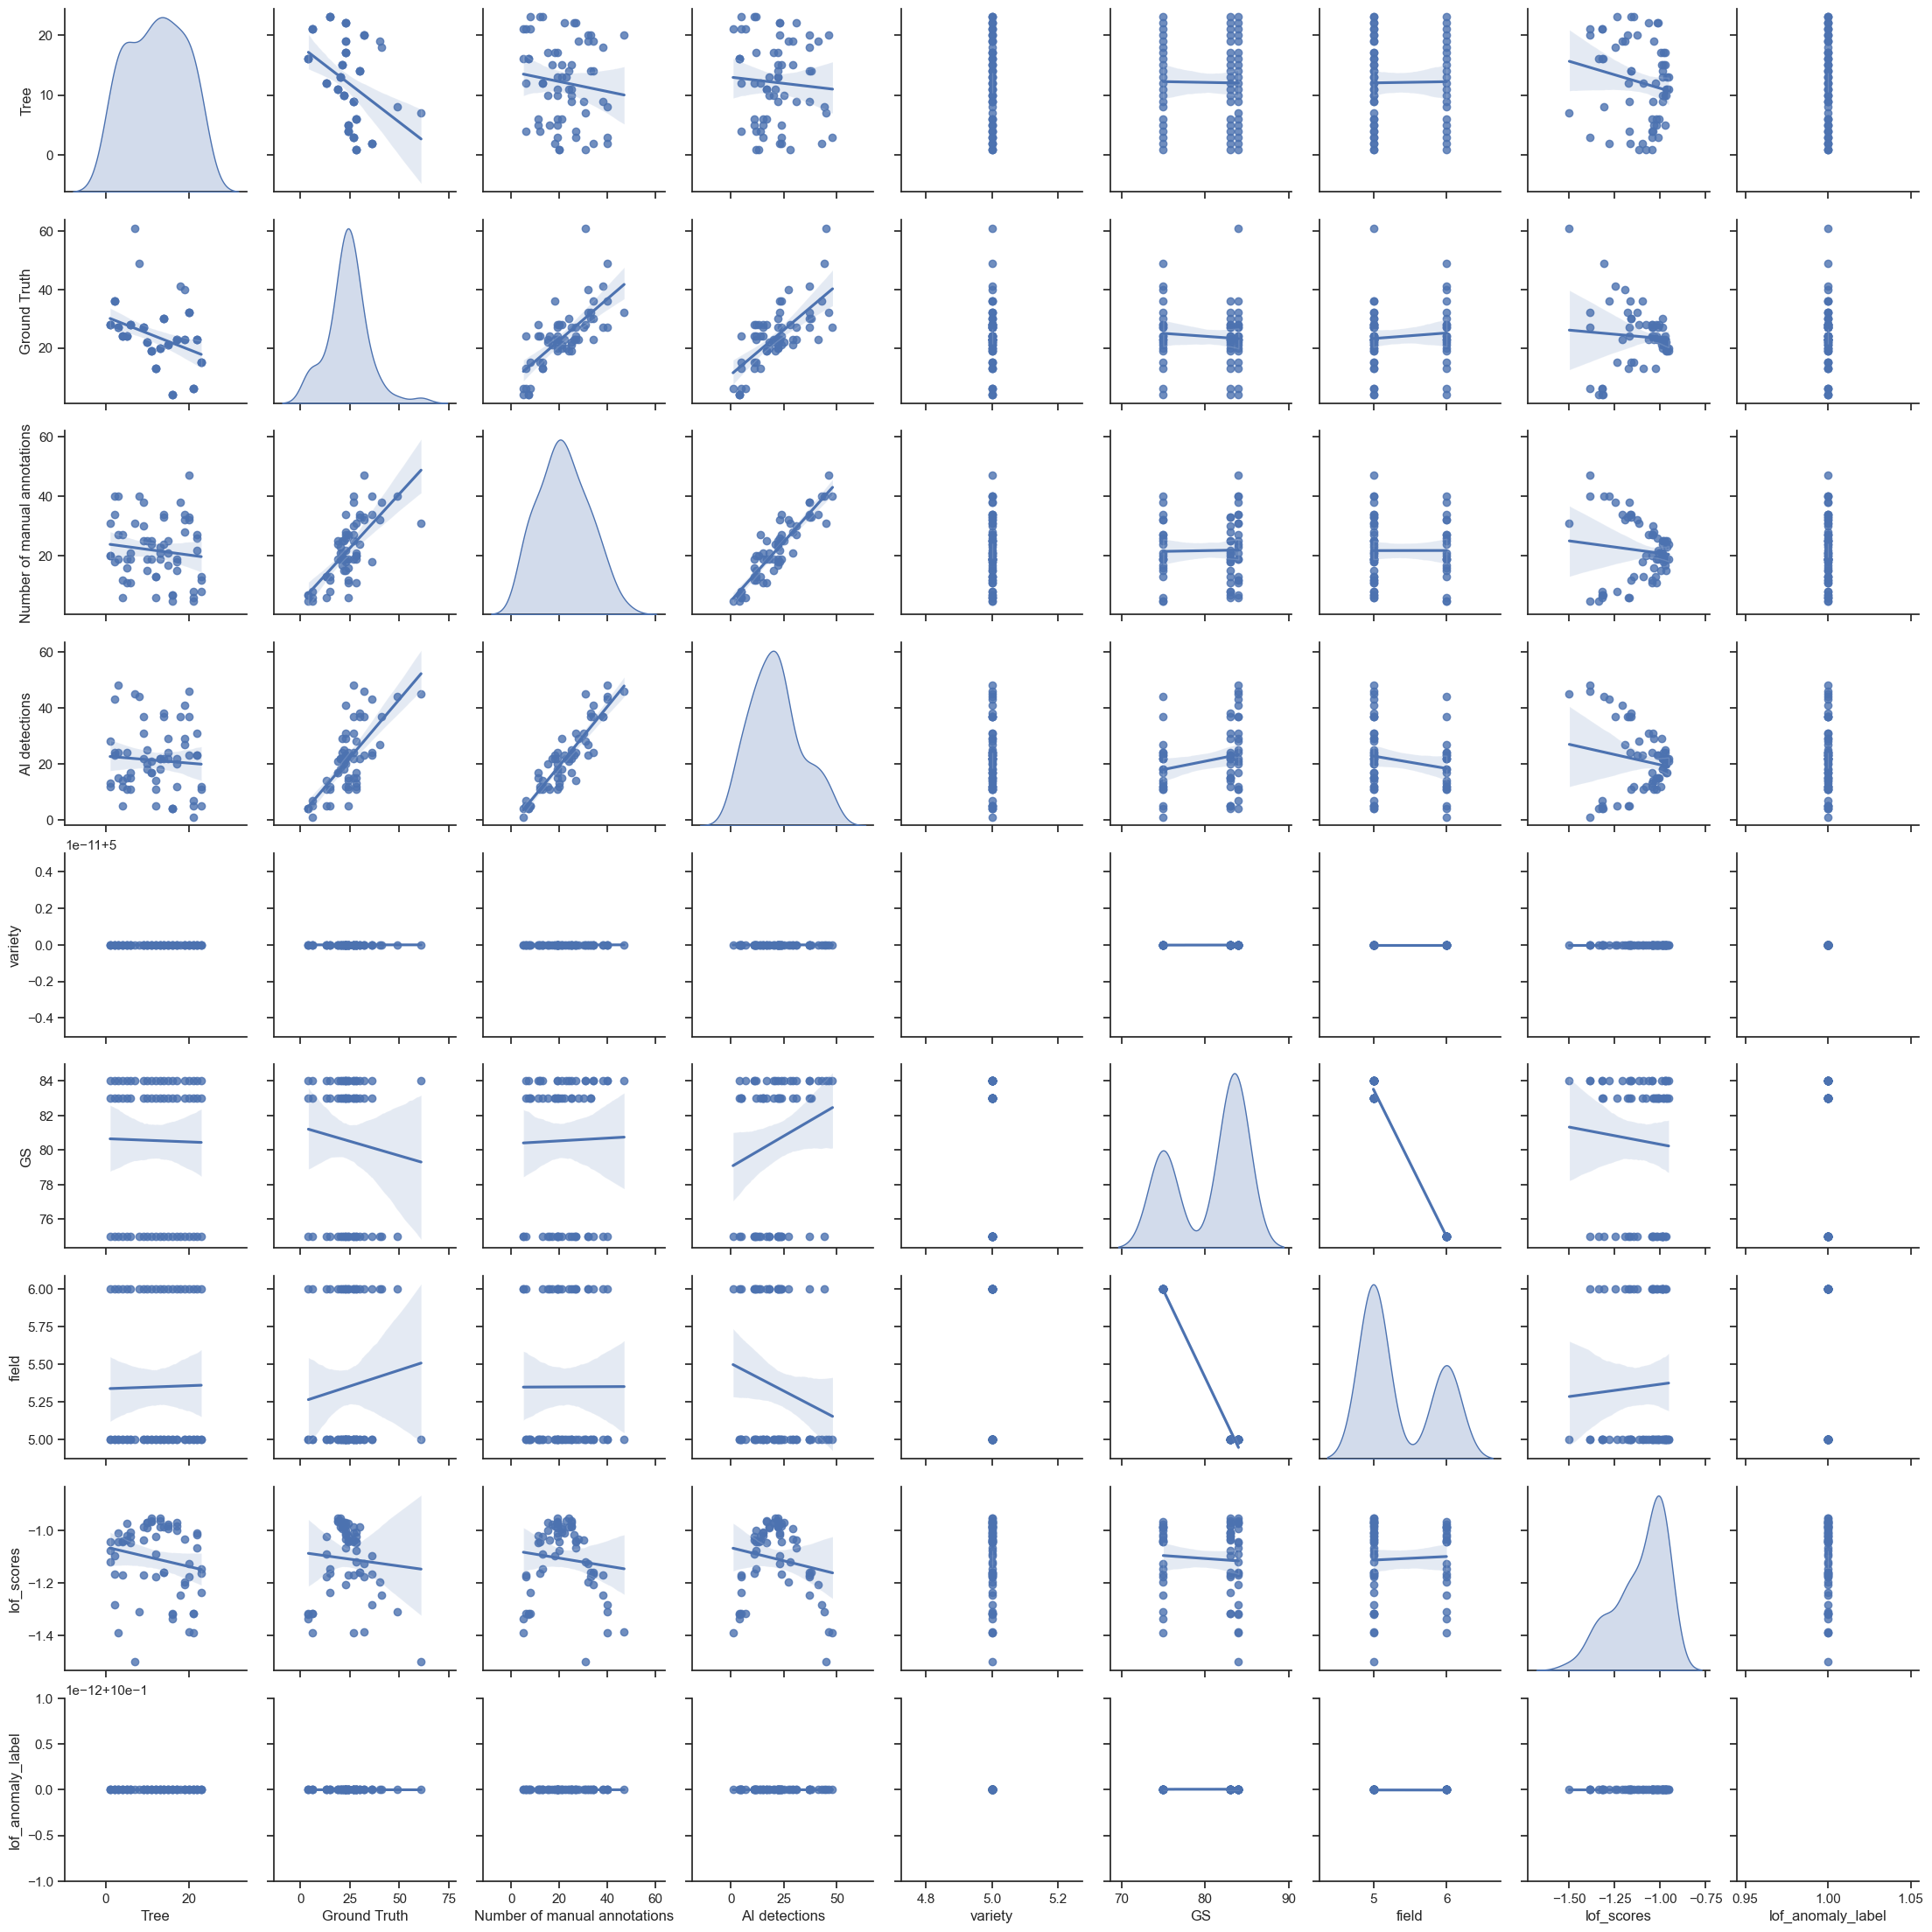

In [53]:
sns.pairplot(Portygieser_df,kind='reg',diag_kind='kde');

### Lineplots

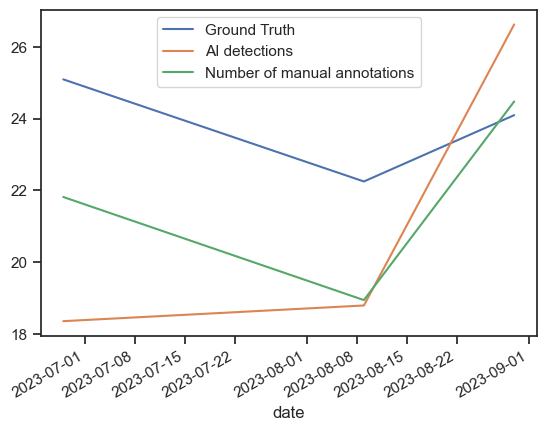

In [54]:
Portygieser_df.groupby('date')['Ground Truth','AI detections','Number of manual annotations'].mean().plot();

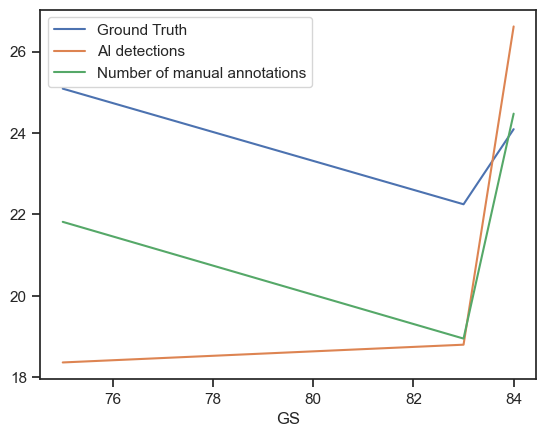

In [55]:
Portygieser_df.groupby('GS')['Ground Truth','AI detections','Number of manual annotations'].mean().plot();

### Scatterplot

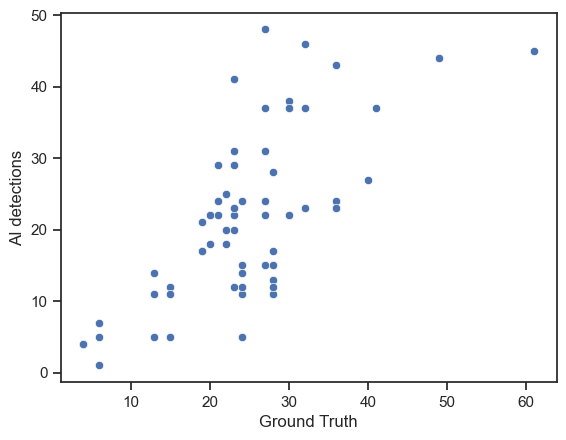

In [56]:
sns.scatterplot(x = Portygieser_df['Ground Truth'], y = Portygieser_df['AI detections']);

# Sauvignon Blanc

In [57]:
Sauvignon_Blanc_df=df[df['variety']==6]

### Boxplot

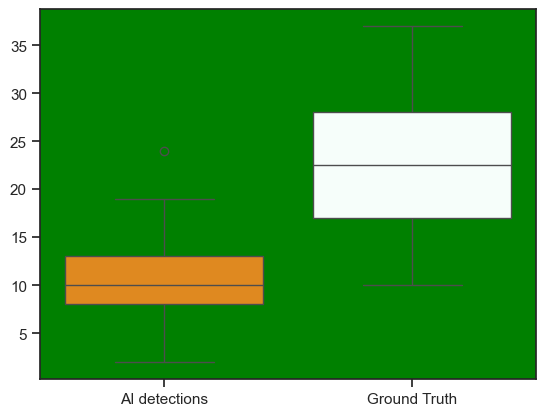

In [58]:
columns_to_plot =['AI detections','Ground Truth']
sns.set(style="ticks")
box_colors = ["darkorange","mintcream"]
ax = sns.boxplot(data=Sauvignon_Blanc_df[columns_to_plot], palette=box_colors)
ax.set_facecolor("green")
plt.show()

### Pairplot

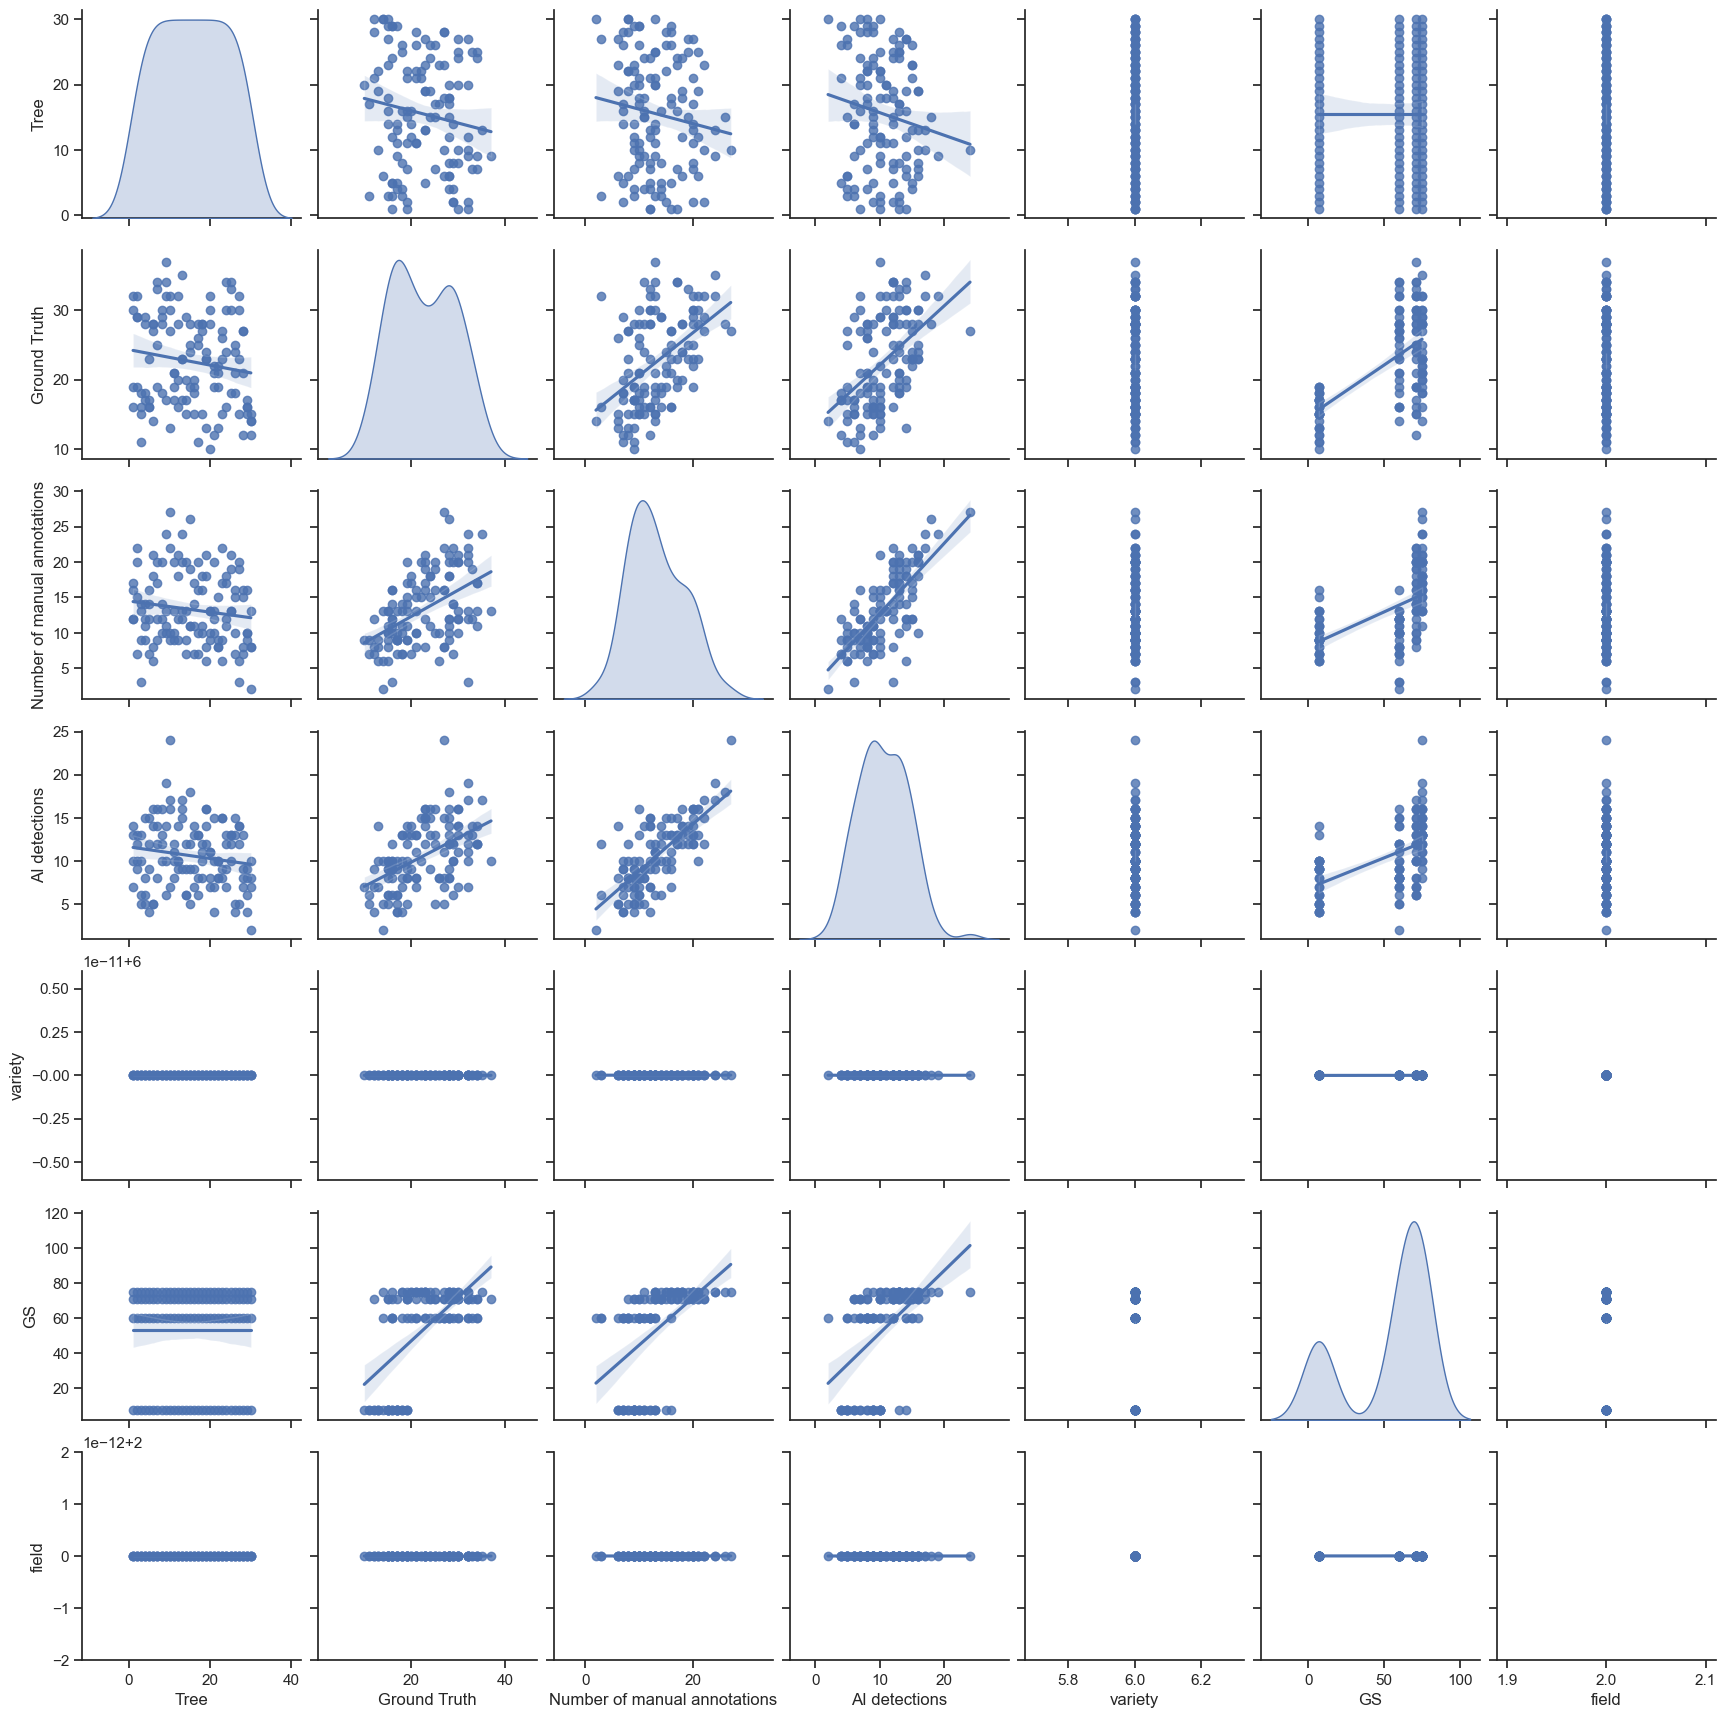

In [59]:
sns.pairplot(Sauvignon_Blanc_df,kind='reg',diag_kind='kde');

### Lineplots

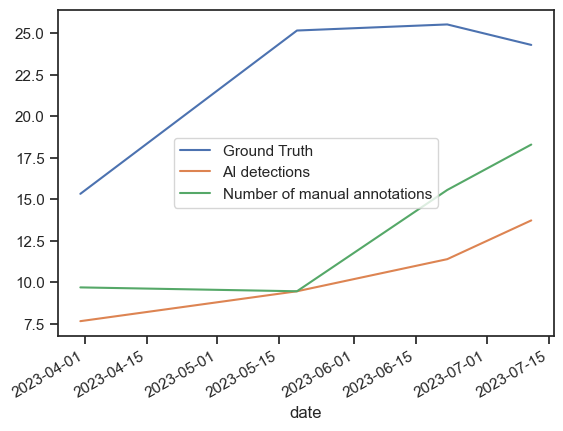

In [60]:
Sauvignon_Blanc_df.groupby('date')['Ground Truth','AI detections','Number of manual annotations'].mean().plot();

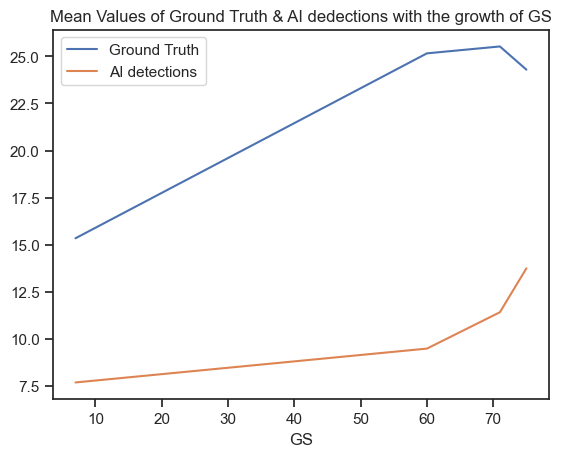

In [61]:
grouped_data = Sauvignon_Blanc_df.groupby('GS')['Ground Truth','AI detections'].mean()
grouped_data.plot()
plt.title('Mean Values of Ground Truth & AI dedections with the growth of GS')
plt.show()

### Scatterplot

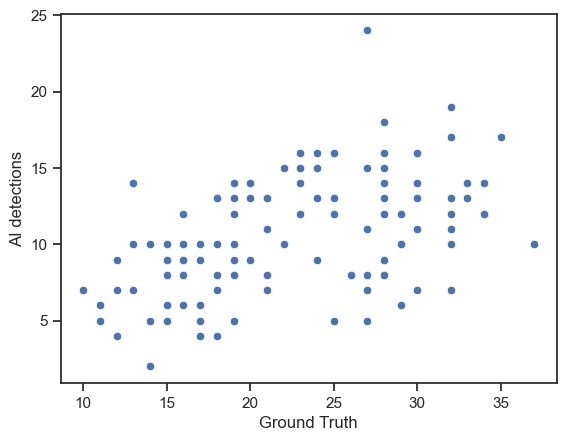

In [62]:
sns.scatterplot(x = Sauvignon_Blanc_df['Ground Truth'], y = Sauvignon_Blanc_df['AI detections']);

# All Varieties

### Boxplot

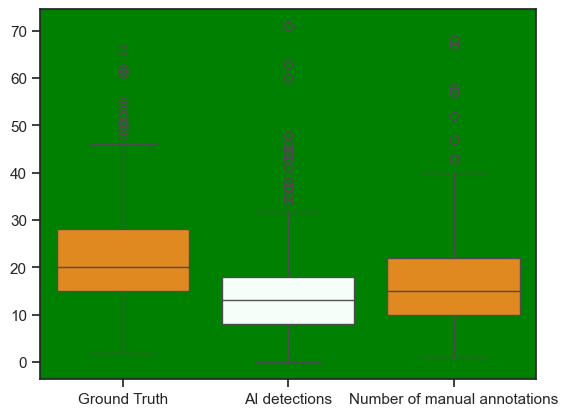

In [63]:
columns_to_plot =['Ground Truth','AI detections','Number of manual annotations']
sns.set(style="ticks")
box_colors = ["darkorange","mintcream"]
ax = sns.boxplot(data=df[columns_to_plot], palette=box_colors)
ax.set_facecolor("green")
plt.show()

### Pairplot

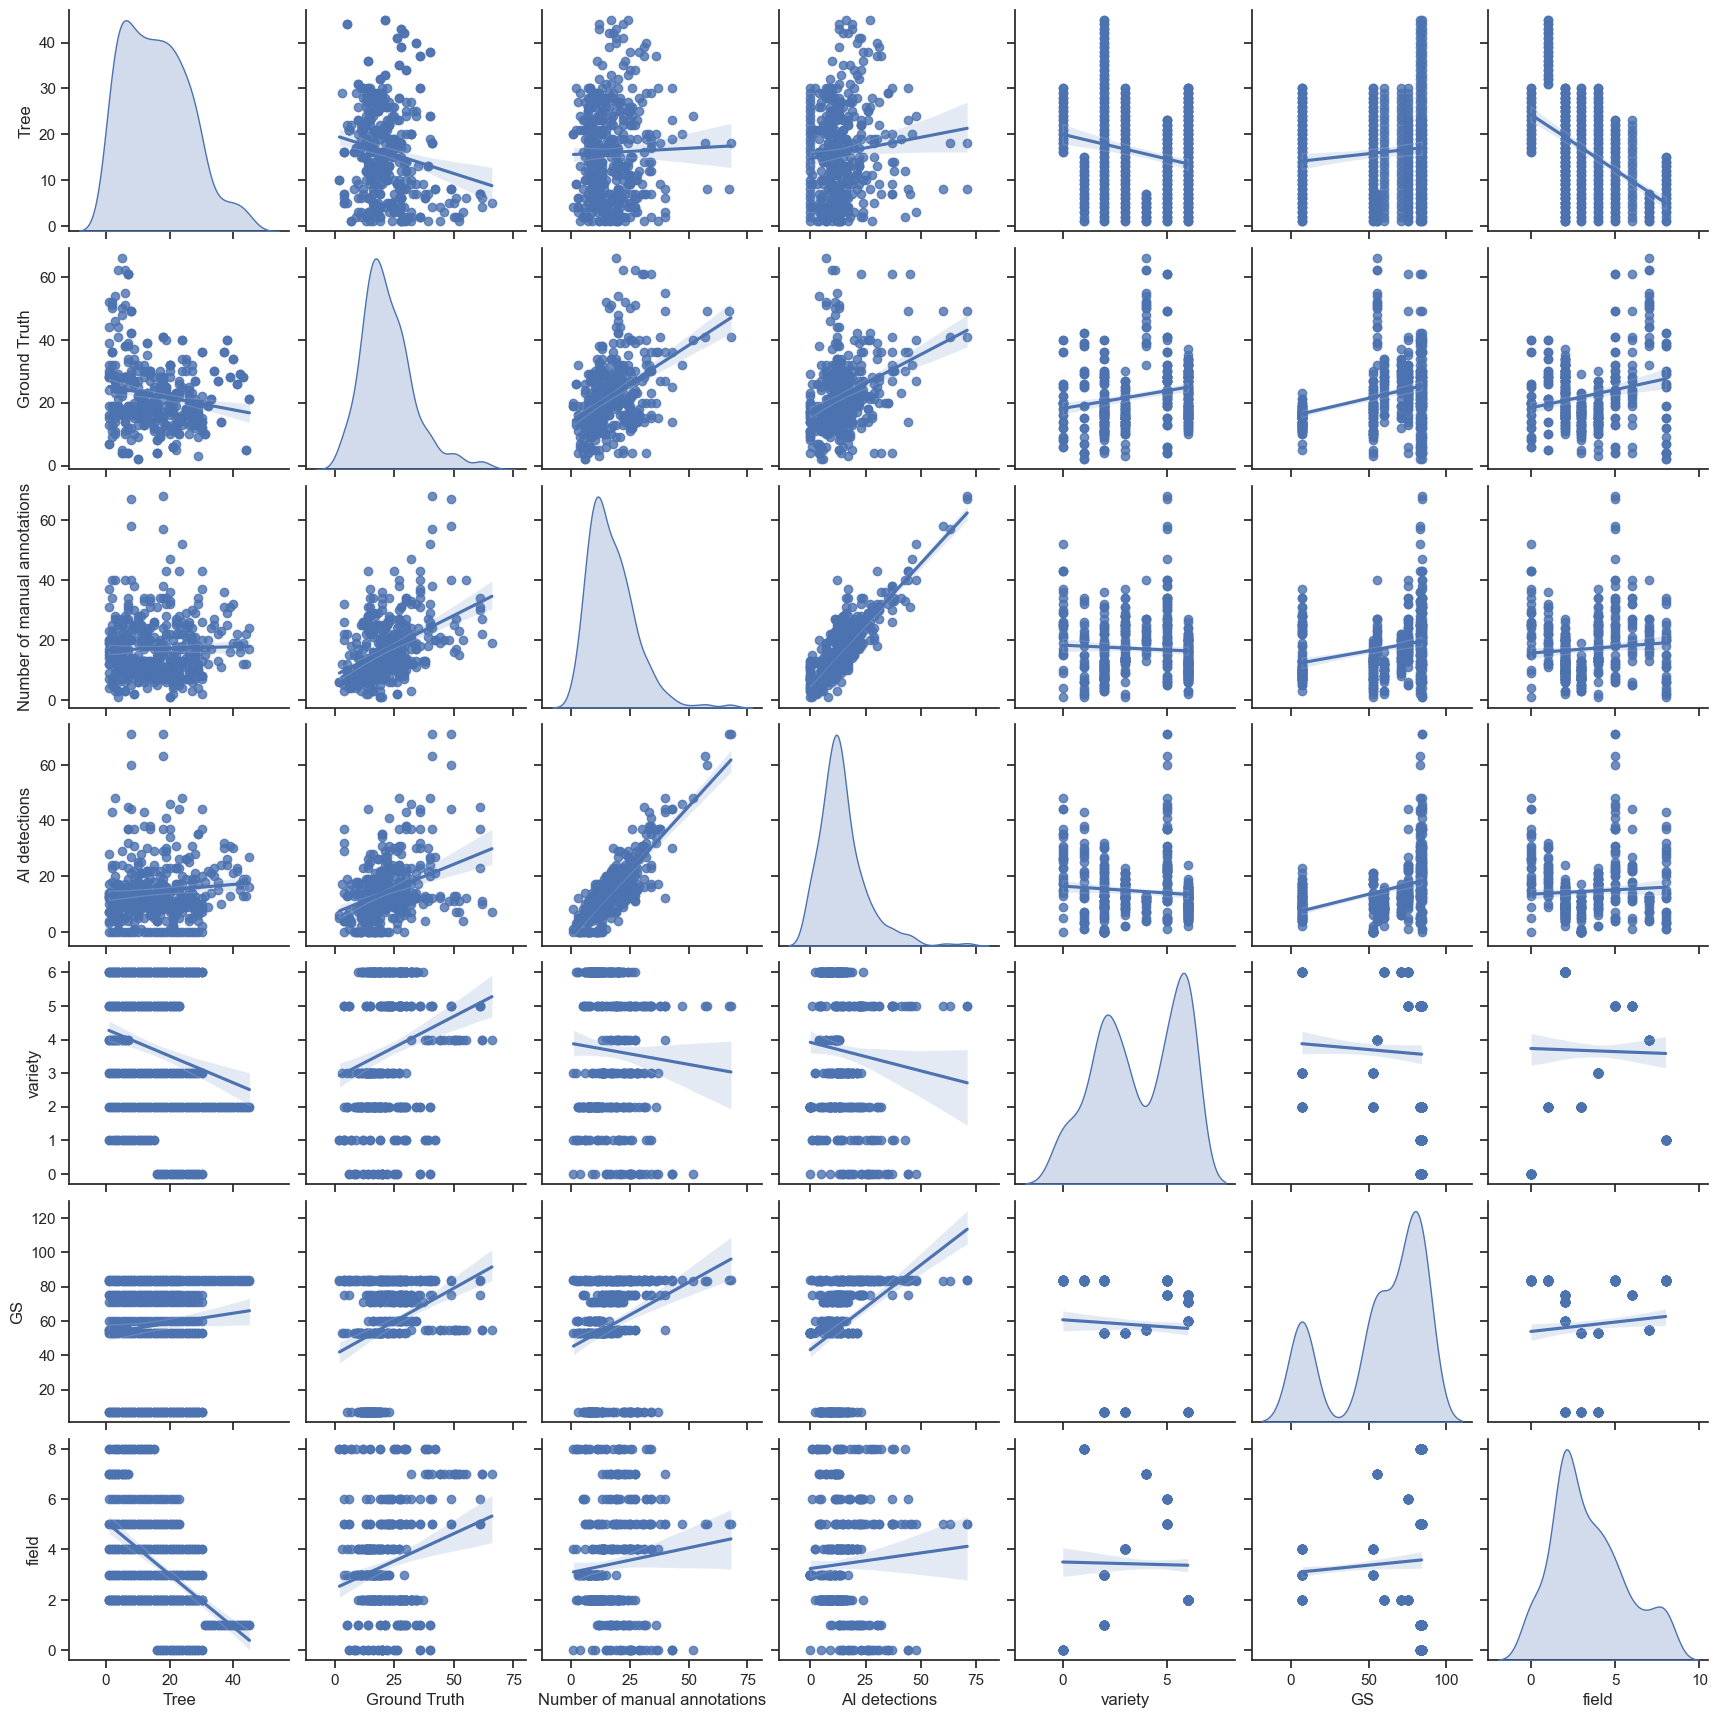

In [64]:
sns.pairplot(df,kind='reg',diag_kind='kde');

### Lineplots

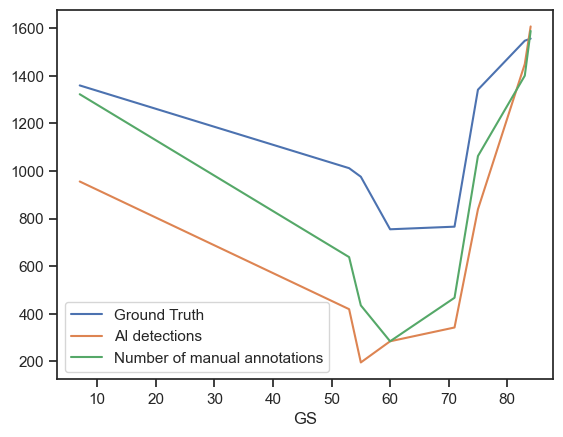

In [65]:
df.groupby('GS')['Ground Truth','AI detections','Number of manual annotations'].sum().plot();

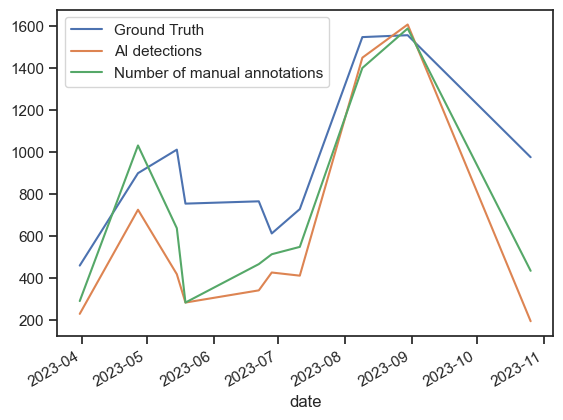

In [66]:
df.groupby('date')['Ground Truth','AI detections','Number of manual annotations'].sum().plot();

### Scatterplot

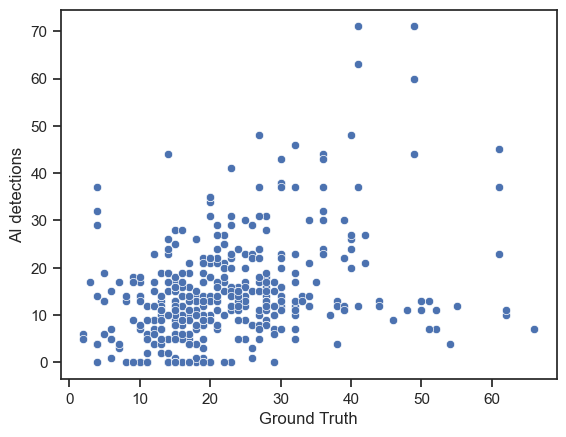

In [67]:
sns.scatterplot(x = df['Ground Truth'], y = df['AI detections']);